# Examensarbete

Kod använd i examensarbetet "Livscykelanlys på miljöpåverkan av saneringsmetoder för förorenad mark - En fallstudie för Norra Djurgårdsstaden"

av

Burklint, Malin

## Set-up

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
style.available
style.use('seaborn-v0_8')

import numpy as np
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
from collections import defaultdict, OrderedDict
import brightway2 as bw2
from bw2data.parameters import ActivityParameter, ProjectParameter, DatabaseParameter, Group
import itertools

from IPython.display import display, Math

# Custom utils defined for inter-acv
from lca_algebraic import *
from lca_algebraic.stats import * 
import lca_algebraic as la
import re

from copy import deepcopy
from os.path import isfile

In [2]:
fg = bw2.Database('Schakt Deponi')

In [3]:
project = 'ei-3.11'
bw2.projects.set_current(project)
USER_DB = 'Schakt Deponi'

In [4]:
IPCC = [method for method in bw2.methods if "IPCC 2021" in str(method) 
        and "excl. biogenic CO2" in str(method) 
        and "GWP100" in str(method)
        and "LT" not in str(method)
        and "incl. SLCFs" not in str(method)]
IPCC_unit = [r'kg $CO_2$-eq']
acid = [method for method in bw2.methods if "terrestrial acidification potential (TAP)" in str(method)
       and "midpoint (H) no LT" in str(method)]
acid_unit = [r'kg $SO_2$-eq']
eutrofresh = [method for method in bw2.methods if "freshwater eutrophication potential (FEP)" in str(method)
       and "midpoint (H) no LT" in str(method)]
eutrofresh_unit = ['kg P-eq']
eutromarine = [method for method in bw2.methods if "marine eutrophication potential (MEP)" in str(method)
       and "midpoint (H) no LT" in str(method)]
eutromarine_unit = ['kg N-eq']
material = [method for method in bw2.methods if "surplus ore potential (SOP)" in str(method)
       and "midpoint (H) no LT" in str(method)]
material_unit = ['kg Cu-eq']
water = [method for method in bw2.methods if "water consumption potential (WCP)" in str(method)
        and "midpoint (H) no LT" in str(method)]
water_unit = [r'm $^{3}$']

In [5]:
all_methods = IPCC + acid + eutrofresh + eutromarine + material + water
all_methods_units = IPCC_unit + acid_unit + eutrofresh_unit + eutromarine_unit + material_unit + water_unit

In [6]:
c_string = 'climate change - global warming potential (GWP100)'
acid_string = 'terrestrial acidification potential (TAP)'
eutrofresh_string = 'freshwater eutrophication potential (FEP)'
eutromarine_string = 'marine eutrophication potential (MEP)'
material_string = 'surplus ore potential (SOP)'
water_string = 'water consumption potential (WCP)'

In [7]:
# If you get Value Error: 0 -> There's a parameter with Unknown uncertainty 
# change it to No uncertainty
loadParams()

3
sikt_switch_param
oxid_switch_param
diesel_switch_param


In [8]:
# define helping functions
def calcError(median, min_value, max_value):
    '''
    Calculates error margin based on min and max value - used later in plotting
    Input: median, min and max
    Output: an array with the differences between median and min and max values, respectively
    '''
    return np.array([median-min_value, max_value-median]).reshape((2,1))

In [9]:
def calcMinMaxMedianError(Y, column):
    '''
    Input: The dataframe and column heading
    Return min, max, median and error values in a column in a dataframe
    '''
    min_value = Y[column].min()
    max_value = Y[column].max()
    median = Y[column].median()
    error = calcError(median, min_value, max_value)
    return min_value, max_value, median, error

In [10]:
def calc_perc(col1, col2):
    '''
    Input: two df columns
    Returns: percentage of how many times col2 was lower (100% = 100 etc)
    '''    
    delta = col1 - col2
    alt1 = 0
    alt2 = 0
    for row in delta:
        if row > 0:
            alt2 += 1
        elif row < 0:
            alt1 += 1
    perc = alt2 / (alt1+alt2)
    return perc*100

In [60]:
for act in fg:

    #print(act['name'])

    for e in act.exchanges():

        #print(e.input['name'])

        #print(e.amount)

        if(e.amount == None):

            print('This is the one: ' + act['name'] + ', ' + e.input['name'])

In [17]:
for act in fg2:

    #print(act['name'])

    for e in act.exchanges():

        #print(e.input['name'])

        #print(e.amount)

        if(e.amount == None):

            e['amount']=1

            e.save() # if we don't save it, nothing happens

### generate y:s and data

In [14]:
'''
# remove #AsTech from biosphere, if needed, sometimes they appear out of nowhere
biosphere = bw2.Database('biosphere3')
for a in biosphere:
    if '#asTech' in a.key[1]:
        a.delete()
'''

"\n# remove #AsTech from biosphere, if needed, sometimes they appear out of nowhere\nbiosphere = bw2.Database('biosphere3')\nfor a in biosphere:\n    if '#asTech' in a.key[1]:\n        a.delete()\n"

In [11]:
from lca_algebraic.stats import _stochastics
from lca_algebraic.stats import _compute_stochastics

In [12]:
Ei_akt = findActivity("ALLA", db_name=USER_DB)

In [13]:
# tar tid
problem1, params, Y1 = _stochastics(Ei_akt, all_methods, n=5000)

Generating samples ...


C:\Users\liza-\anaconda3\envs\brightway\Lib\site-packages\SALib\sample\saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (5000) is equal to `2^n`.
        
  warnings.warn(msg)


Transforming samples ...


Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' 

In [14]:
Y1

,climate change: total (excl. biogenic CO2) - global warming potential (GWP100),acidification: terrestrial no LT - terrestrial acidification potential (TAP) no LT,eutrophication: freshwater no LT - freshwater eutrophication potential (FEP) no LT,eutrophication: marine no LT - marine eutrophication potential (MEP) no LT,material resources: metals/minerals no LT - surplus ore potential (SOP) no LT,water use no LT - water consumption potential (WCP) no LT
0,874.736526,7.005327,0.030411,0.012085,35.990197,14.842045
1,874.800359,7.005425,0.030412,0.012085,35.992098,14.842176
2,874.736526,7.005327,0.030411,0.012085,35.990197,14.842045
3,868.756485,6.937504,0.030250,0.011976,35.726572,14.698245
4,874.736526,7.005327,0.030411,0.012085,35.990197,14.842045
...,...,...,...,...,...,...
759995,744.127630,6.411165,0.019788,0.012279,40.457707,14.515233
759996,705.521522,6.220333,0.019875,0.011706,37.366359,12.656473
759997,810.494080,7.156887,0.022163,0.013394,41.312934,16.016133
759998,744.147275,6.411272,0.019788,0.012279,40.459082,14.515375


In [15]:
Ei_akt_min, Ei_akt_max, Ei_akt_med, Ei_akt_e = calcMinMaxMedianError(Y1, 'climate change: total (excl. biogenic CO2) - global warming potential (GWP100)')

In [16]:
Ei_akt_min

608.2648682681048

In [17]:
Ei_akt_max

1056.938144869818

In [20]:
climate_label = 'kg CO'+'$_{2}$' +'-eq / m' +'$^{2}$' +' behandlad yta'
acid_label = 'kg SO'+'$_{2}$' +'-eq / m' +'$^{2}$' +' behandlad yta'
ef_label = 'kg P'+'-eq / m' +'$^{2}$' +' behandlad yta'
em_label = 'kg N'+'-eq / m' +'$^{2}$' +' behandlad yta'
m_label = 'kg Cu'+'-eq / m' +'$^{2}$' +' behandlad yta'
w_label = 'm' +'$^{3}$ / m' +'$^{2}$' +' behandlad yta'

[]

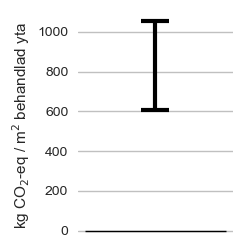

In [21]:
# result figure
fig, ax = plt.subplots(figsize = (2,3))
ax.errorbar(y=Ei_akt_med, x=1, yerr = Ei_akt_e, capsize=10, elinewidth=3, markeredgewidth=3, color='black')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.set_ylabel(climate_label)
ax.hlines(y=0, xmin=0.5, xmax=1.5, linewidth=1, color='black')
ax.set_xticks([])

In [22]:
fig.savefig('Tot_C', dpi=600, bbox_inches='tight')

In [23]:
Ei_aktA = findActivity("ALLA", db_name=USER_DB)

In [110]:
Ei_aktA_min, Ei_aktA_max, Ei_aktA_med, Ei_aktA_e = calcMinMaxMedianError(Y1, 'acidification: terrestrial no LT - terrestrial acidification potential (TAP) no LT')

In [115]:
Ei_aktEF = findActivity("ALLA", db_name=USER_DB)

In [116]:
Ei_aktEF_min, Ei_aktEF_max, Ei_aktEF_med, Ei_aktEF_e = calcMinMaxMedianError(Y1, 'eutrophication: freshwater no LT - freshwater eutrophication potential (FEP) no LT')

In [25]:
Ei_aktEM = findActivity("ALLA", db_name=USER_DB)

In [26]:
Ei_aktEM_min, Ei_aktEM_max, Ei_aktEM_med, Ei_aktEM_e = calcMinMaxMedianError(Y1, 'eutrophication: marine no LT - marine eutrophication potential (MEP) no LT')

In [119]:
Ei_aktM = findActivity("ALLA", db_name=USER_DB)

In [120]:
Ei_aktM_min, Ei_aktM_max, Ei_aktM_med, Ei_aktM_e = calcMinMaxMedianError(Y1, 'material resources: metals/minerals no LT - surplus ore potential (SOP) no LT')

In [123]:
Ei_aktW = findActivity("ALLA", db_name=USER_DB)

In [124]:
Ei_aktW_min, Ei_aktW_max, Ei_aktW_med, Ei_aktW_e = calcMinMaxMedianError(Y1, 'water use no LT - water consumption potential (WCP) no LT')

[]

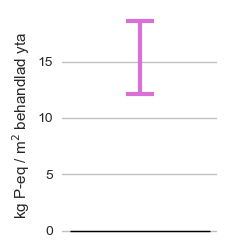

In [125]:
fig, ax = plt.subplots(figsize = (2,3))

ax.errorbar(y=Ei_aktW_med, x=1, yerr = Ei_aktW_e, capsize=10, elinewidth=3, markeredgewidth=3, color='orchid')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.set_ylabel(ef_label)
ax.hlines(y=0, xmin=0.5, xmax=1.5, linewidth=1, color='black')
ax.set_xticks([])

In [126]:
fig.savefig('Tot_W', dpi = 600, bbox_inches = 'tight')

## CA

In [15]:
## CA setup
from __future__ import print_function, unicode_literals
from eight import *

from bw2data import databases, methods, get_activity, Method
from bw2calc import LCA

In [16]:
# *** lägg till nya dbs??? ***

fg = 'Schakt Deponi' # om flera databaser, lägg till flera dbs!
fg2 = 'BALANCE_fg'
fu1 = {('Schakt Deponi', '507014e52a844eaea7e9cbe55d3ba53e'):1} #Alla
fu2 = {('Schakt Deponi', '9d59bcf49e804a35b67a7945ea21cf00'):1} #Schakt
fu3 = {('Schakt Deponi', 'oxideringSwitch'):1} #Oxideringmorän
fu4 = {('Schakt Deponi', 'b4173d4ece2842b49bcaa7e3440b8337'):1} #Oxideringlera

In [17]:
def traverse_tagged_databases(
    functional_unit, method, label="tag", default_tag="other", secondary_tags=[],
    fg_databases=None, bio2tech=False, parent4other=False
):

    """
    ESA : allows to perform grouping as in SimaPro 
    Traverse a functional unit throughout its foreground database(s) or the    
    listed databses in fg_databses, and group impacts by tag label.

    Contribution analysis work by linking impacts to individual activities.
    However, you also might want to group impacts in other ways. For example,
    give individual biosphere exchanges their own grouping, or aggregate two
    activities together.
    
    Consider this example system, where the letters are the tag labels, and the
    numbers are exchange amounts. The functional unit is one unit of the tree
    root.

    .. image:: images/tagged-traversal.png
       :alt: Example tagged supply chain

    In this supply chain, tags are applied to activities and biosphere exchanges.
    If a biosphere exchange is not tagged, it inherits the tag of its producing
    activity. Similarly, links to other databases are assessed with the usual
    LCA machinery, and the total LCA score is tagged according to its consuming
    activity. If an activity does not have a tag, a default tag is applied.

    We can change our visualization to show the use of the default tags:
    
    .. image:: images/tagged-traversal-2.png
       :alt: Example tagged supply chain

    And then we can manually calculate the tagged impacts. Normally we would
    need to know the actual biosphere flows and their respective
    characterization factors (CF), but in this example we assume that each
    CF is one. Our result, group by tags, would therefore be:

        * **A**: :math:`6 + 27 = 33`

        * **B**: :math:`30 + 44 = 74`

        * **C**: :math:`5 + 16 + 48 = 69`

        * **D**: :math:`14`

    This function will only traverse the foreground database, i.e. the
    database of the functional unit activity. A functional unit can have
    multiple starting nodes; in this case, all foreground databases are
    traversed.

    Input arguments:
        * ``functional_unit``: A functional unit dictionary, e.g. ``{("foo", "bar"): 42}``.
        * ``method``: A method name, e.g. ``("foo", "bar")``
        * ``label``: The label of the tag classifier. Default is ``"tag"``
        * ``default_tag``: The tag classifier to use if none was given. Default is ``"other"``
        * ``secondary_tags``: List of tuples in the format (secondary_label, secondary_default_tag). Default is empty list.      
        * ``fg_databases``: a list of foreground databases to be traversed, e.g. ['foreground', 'biomass', 'machinery']
                            It's not recommended to include all databases of a project in the list to be traversed, especially not ecoinvent itself

    Returns:
        Aggregated tags dictionary from ``aggregate_tagged_graph``, and tagged supply chain graph from ``recurse_tagged_database``.


    """

    lca = LCA(functional_unit, method)
    lca.lci(factorize=True)
    lca.lcia()
    method_dict = {o[0]: o[1] for o in Method(method).load()}
    
    graph = [
        recurse_tagged_database(
            key, amount, method_dict, lca, label, default_tag, secondary_tags, fg_databases, parent4other
        )
        for key, amount in functional_unit.items()
    ]

    return aggregate_tagged_graph(graph, bio2tech), graph

In [18]:
def aggregate_tagged_graph(graph, bio2tech=False,):
    """Aggregate a graph produced by ``recurse_tagged_database`` by the provided tags.

    Outputs a dictionary with keys of tags and numeric values.
    
    If bio2tech is set to True, then biosphere exchanges are added to the tag of the parent activity (instead of direct emissions)

    .. code-block:: python

        {'a tag': summed LCIA scores}

    """

    def recursor(obj, scores):
        scores[obj["tag"]] += obj["impact"]
        if bio2tech:
            for flow in obj["biosphere"]:
                scores[obj["tag"]] += flow["impact"]
        else: # default behavior
            for flow in obj["biosphere"]:
                scores[flow["tag"]] += flow["impact"]
        for exc in obj["technosphere"]:
            scores = recursor(exc, scores)
        return scores

    scores = defaultdict(int)
    for obj in graph:
        scores = recursor(obj, scores)
    return scores

In [19]:
def recurse_tagged_database(
    activity, amount, method_dict, lca, label, default_tag, secondary_tags=[], fg_databases=None, parent4other=False
):

    """Traverse a foreground database and assess activities and biosphere flows by tags.


    Input arguments:


        * ``activity``: Activity tuple or object
        * ``amount``: float
        * ``method_dict``: Dictionary of biosphere flow tuples to CFs, e.g. ``{("biosphere", "foo"): 3}``
        * ``lca``: An ``LCA`` object that is already initialized, i.e. has already calculated LCI and LCIA with same method as in ``method_dict``
        * ``label``: string
        * ``default_tag``: string
        * ``secondary_tags``: List of tuples in the format (secondary_label, secondary_default_tag). Default is empty list.     
        * ``fg_databases``: a list of foreground databases to be traversed, e.g. ['foreground', 'biomass', 'machinery']
                            It's not recommended to include all databases of a project in the list to be traversed, especially not ecoinvent itself
        * parent4other=False : if True, untagged technosphere exchanges are aggregated with their parent .. become "outside"

  Returns:
    .. code-block:: python

        {
            'activity': activity object,
            'amount': float,
            'tag': string,
            'secondary_tags': [list of strings],
            'impact': float (impact of inputs from outside foreground database),
            'biosphere': [{
                'amount': float,
                'impact': float,
                'tag': string,
                'secondary_tags': [list of strings]
            }],
            'technosphere': [this data structure]
        }

    """

    if isinstance(activity, tuple):
        activity = get_activity(activity)
        
    if fg_databases == None: # then set the list equal to the database of the functional unit 
    
        fg_databases = [activity['database']] # list, single item
    
    elif fg_databases == list(bw2.Database(activity['database']).find_graph_dependents()): 
        # check that the list fg_databases does not include all the databases involved in the FU 
        # (otherwise, it would mean we are likely to have to recurse through ecoinvent... not funny)
        # ideally, should only on first call of recurse_tagged_database
        raise Exception('The list of databases to traverse fg_databases should not be equal to the all databases involved in the project. You risk to attempt to traverse a background database like ecoinvent - it would take too much time')

    inputs = list(activity.technosphere())
    #print('activity', activity['name'])
    #print('inputs', inputs)
    
    production = list(activity.production())
    if len(production) == 1:
        scale = production[0]["amount"]
    elif not production:
        # Assume production amount of 1
        scale = 1
    else:
        raise ValueError("Can't scale by production exchange")

    inside = [exc for exc in inputs if exc["input"][0] in fg_databases] # inside = activities in fg_databases
    #print('inside', inside)
    
    outside = {
        exc["input"]: exc["amount"] / scale * amount
        for exc in inputs
        if exc["input"][0] not in fg_databases ## calculates impacts for activities outside of fg_databases
    } # this is a dict of functional units, ready for lca score calculation

    if outside:
        lca.redo_lcia(outside)
        outside_score = lca.score

    else:
        outside_score = 0

    if parent4other:
        #if this option is set to True, will change default_tag's value to the tag
        # of the parent activity if itself was not empty 
        if activity.get(label) != None:
            default_tag = activity.get(label)
    
    #print(default_tag)
    return {
        "activity": activity,
        "amount": amount,
        "tag": activity.get(label) or default_tag,
        "secondary_tags": [activity.get(t[0]) or t[1] for t in secondary_tags],
        "impact": outside_score,
        "biosphere": [
            {
                "amount": exc["amount"] / scale * amount,
                "impact": exc["amount"]
                / scale
                * amount
                * method_dict.get(exc["input"], 0),
                "tag": exc.get(label) or activity.get(label) or default_tag,
                "secondary_tags": [
                    exc.get(t[0]) or activity.get(t[0]) or t[1] for t in secondary_tags
                ],
            }
            for exc in activity.biosphere()
        ],
        "technosphere": [
            recurse_tagged_database(
                exc.input,
                exc["amount"] / scale * amount,
                method_dict,
                lca,
                label,
                default_tag,
                secondary_tags,
                fg_databases,
                parent4other
            )
            for exc in inside
        ],
    }


In [20]:
def rewrite_tagged_database(fg_db_to_tag, new_data):
    '''
    fg_db_to_dag : name of database to be re-written in bw2
    new_data : the newly tagged database
    bw2 will raise error if new data does not correspond to target database
    '''
    val = input("Do you want to proceed (Y/N) ? ")
    if val != 'Y':
        print('Okay, we stop here')
    else:
        db = bw2.Database(fg_db_to_tag)
        db.write(new_data)

In [21]:
def conveniently_tag_database_v2(fg_db_to_tag = '', label='', ):
    '''
    Auxiliary function to conveniently assign new tag labels to a foreground database, for group analysis.
    Select a forground database to tag, via fg_db_to_tag;
    Then define the label name, via label
    Then, loop through all activities, and assign directly new attributes, using peewee functions to save

    Does not return anything. Changes are directly saved to database. Should avoid running into bugs of re-writing database. 
    
    Usage: conveniently_tag_database('fg_database', 'label_name')
    '''
    db = bw2.Database(fg_db_to_tag)
    print('There are %i items to be tagged, one by one' %(len(db)) )
    val = input("Do you want to proceed (Y/N) ? ")
    n=0
    r=0
    if val != 'Y':
        print('Okay, we stop here')
    else:
        print("Lets proceed! Type 'skip' in order to not tag the given activity or remove existing tag")
        for act in db:
            val = input(act['name'] + "... to be in the group called... ? ")
            
            if val == 'skip':
                # need to pop the key if it was defined previously
                act.pop(label, 'label was not present')
                r+=1
            if val != 'skip':
                act[label] = val
                n+=1
            
            act.save() # save back to db
    print("Number of activities tagged: %i" %(n))
    print("Number of activities skipped: %i" %(r))

In [22]:
def run_graphTaggedTraversal(fus, methods, methods_units, label, default_tag, fg_dbs, bio2tech=True, parent4other=True):
    '''
    For a set of functional units, and a set of impact assessment method (but slow)
    '''
    
    result_pds = pd.DataFrame()
    for fu in fus:
        #lci, lcia
        a = bw2.get_activity( list(fu.items())[0][0] ) # tuple of activity
        print(a['name'], str(list(fu.items())[0][1]))
        scores = []
        for n, m in enumerate(methods): # inefficient on methods, should use multi-method version with switch lcia
            agg_graph, graph = traverse_tagged_databases(fu, m, 
                                                         label=label, default_tag=default_tag,
                                                         fg_databases=fg_dbs,
                                                         bio2tech=bio2tech,
                                                         parent4other=parent4other
                                                        )

            result_pd = pd.DataFrame(agg_graph, index=[0])

            result_pd['Impact'] = [m]
            result_pd['Units'] = [methods_units[n]]
                       
            result_pd['FU'] = [ a['name'] ]
            result_pd['FU_amount'] = [ str(list(fu.items())[0][1]) ]
            # list(fu.items())[0][0]+'-'+str(list(fu.items())[0][1]) 

            result_pds = result_pds.append(result_pd, sort=False)

    result_pds.set_index(['FU','FU_amount', 'Impact', 'Units'], inplace=True)
    
    return result_pds

In [23]:
## contribution analysis functions, adapted for lca_agebraic, with multiple impact categories & tags
def runAlgebraicGraphTraversal(fus, methods, label="tag", default_tag="other", secondary_tags=[],
    fg_databases=None, bio2tech=False, parent4other=False
):
    '''
    Loop around multi_algebraic_traverse_tagged_databases, to perform analysis for multiple functional units at once.
    - fus : a list of fu dictionaries or a single fu dict
    - methods: a list of method tuples
    - label: name of label for grouping
    '''
    all_graphs = {}
    if(not isinstance(fus, list)):
        fus = [fus]
    for fu in fus:
        agg_graph, graph = multi_algebraic_traverse_tagged_databases(fu, methods, label, default_tag, secondary_tags, fg_databases, bio2tech, parent4other)
        all_graphs[next(iter(fu))] = {'agg_graph': agg_graph, 'graph': graph}
    return all_graphs

def multi_algebraic_traverse_tagged_databases(
    functional_unit, methods, label="tag", default_tag="other", secondary_tags=[],
    fg_databases=None, bio2tech=False, parent4other=False
):
    # is this really needed?
    lca = bw2.LCA(functional_unit, methods[0])
    lca.lci(factorize=True)
    lca.lcia()
    ###
    
    method_dicts = [{o[0]: o[1] for o in bw2.Method(method).load()} for method in methods]
    graph = [multi_algebraic_recurse_tagged_database(key, amount, methods, method_dicts, lca, label, default_tag, secondary_tags, fg_databases, parent4other)
             for key, amount in functional_unit.items()]
             
    return multi_algebraic_aggregate_tagged_graph(graph, bio2tech), graph
    
def multi_algebraic_aggregate_tagged_graph(graph, bio2tech=False):
    """Aggregate a graph produced by ``recurse_tagged_database`` by the provided tags.
    Outputs a dictionary with keys of tags and numeric values.  
    If bio2tech is set to True, then biosphere exchanges are added to the tag of the parent activity (instead of direct emissions)
    .. code-block:: python
        {'a tag': summed LCIA scores}
    """

    def recursor(obj, scores):
        if not scores.get(obj['tag']):
            scores[obj['tag']] = [x for x in obj['impact']]
        else:
            scores[obj['tag']] = [sum(x) for x in zip(scores[obj['tag']], obj['impact'])]
        
        if bio2tech:
            for flow in obj["biosphere"]:
                if not scores.get(flow['tag']):
                    scores[obj["tag"]] = [x for x in flow["impact"] ] 
                else:
                    scores[obj["tag"]] = [sum(x) for x in zip(scores[flow['tag']], flow['impact'])]
                    
        else: # default behavior
            for flow in obj["biosphere"]:
                if not scores.get(flow['tag']):
                    scores[flow['tag']] = [x for x in flow['impact']]
                else:
                    scores[flow['tag']] = [sum(x) for x in zip(scores[flow['tag']], flow['impact'])]
        
        for exc in obj["technosphere"]:
            scores = recursor(exc, scores)
            
        return scores

    scores = defaultdict(int)
    for obj in graph:
        scores = recursor(obj, scores)
    return scores


def _getAmountOrFormula(ex):
    """ Return either a fixed float value or an expression for the amount of this exchange"""
    if 'formula' in ex: # ?
        #print(ex)
        if not 'CORINE' in ex['formula']:
            try:
                return parse_expr(ex['formula'])
            except:
                error("Error while parsing formula '%s' : backing to amount" % ex['formula'])
    return ex['amount']

def multi_algebraic_recurse_tagged_database(
    activity, amount, methods, method_dicts, lca,
    label, default_tag, secondary_tags=[], fg_databases=None, parent4other=False
):
    if isinstance(activity, tuple):
        activity = bw2.get_activity(activity)
        
    if fg_databases == None: # then set the list equal to the database of the functional unit 
        fg_databases = [activity['database']] # list, single item
    elif fg_databases == list(bw2.Database(activity['database']).find_graph_dependents()): 
        # check that the list fg_databases does not include all the databases involved in the FU 
        # (otherwise, it would mean we are likely to have to recurse through ecoinvent... not funny)
        # ideally, should only on first call of recurse_tagged_database
        raise Exception('The list of databases to traverse fg_databases should not be equal to the all databases involved in the project. You risk to attempt to traverse a background database like ecoinvent - it would take too much time')

    inputs = list(activity.technosphere())  
    production = list(activity.production())
    if len(production) == 1:
        scale = production[0]["amount"]
    elif not production:
        # Assume production amount of 1
        scale = 1
    else:
        raise ValueError("Can't scale by production exchange")

    inside = [exc for exc in inputs if exc["input"][0] in fg_databases] # inside = activities in fg_databases
    
    
    outside_exch = []
    for exc in inputs:
        if exc["input"][0] not in fg_databases:
            outside_exch.append(
                {'exch': exc["input"],
                 'formula': _getAmountOrFormula(exc) / scale * amount,
                 'EFs': []}
            )
    
    outside_scores = [0]*len(methods) 
    if outside_exch:
        for out in outside_exch:
            for n,m in enumerate(methods):
                #print("Switching to method ", n)
                lca.switch_method(m)
                lca.redo_lcia( {out['exch']:1} )
                out['EFs'].append(lca.score)
        
        for i,m in enumerate(methods):
            outside_scores[i] = 0
            for out in outside_exch:
                outside_scores[i] += out['EFs'][i]*out['formula']
    else:
        outside_scores = [0]*len(methods)

    ## To be more efficient in outside_scores calculation:
    ## save background EFs and cache them
    ## for each method
    ## calc background impacts
#    def _multiLCA(activities, methods):
#        """Simple wrapper around brightway API"""
#        bw2.calculation_setups['process'] = {'inv': activities, 'ia': methods}
#        lca = bw2.MultiLCA('process')
#        
#        cols = [act for act_amount in activities for act, amount in act_amount.items()]
#        return pd.DataFrame(lca.results.T, index=[method_name(method) for method in methods], columns=cols)
#
#    bg_lca = _multiLCA(bg_act_fu, methods) # returns a df
#    # convert df to a nice useable dictionary here         
#    bg_scores = {}
#    for imethod, method in enumerate(methods) :
#        for iact, act in enumerate(bg_act_fu) :
#            col = self.A_NS_columns[list(act)[0]]
#            bg_scores[(col, list(act)[0], method)] = bg_lca.iloc[imethod, iact]
#            
#            EFs[imethod, col] = bg_lca.iloc[imethod, iact]


    if parent4other:
        #if this option is set to True, will change default_tag's value to the tag
        # of the parent activity if itself was not empty 
        if activity.get(label) != None:
            default_tag = activity.get(label)
    
   # if default_tag == 'Other':
   #    print(default_tag, amount, activity, outside_scores)
   # for exc in activity.biosphere():
   #     print(exc)
   #     print(_getAmountOrFormula(exc))
   #     print([_getAmountOrFormula(exc) / scale
   #             * amount
   #             * method_dict.get(exc["input"], 0) for method_dict in method_dicts]
   #             )
        
    return {
        "activity": activity,
        "amount": amount,
        "tag": activity.get(label) or default_tag,
        "secondary_tags": [activity.get(t[0]) or t[1] for t in secondary_tags],
        "impact": outside_scores, ## ESA
        "biosphere": [
            {
                "amount": _getAmountOrFormula(exc) / scale * amount, # 2/5 2023 need to modify?
                "impact": [ _getAmountOrFormula(exc)
                / scale
                * amount
                * method_dict.get(exc["input"], 0) for method_dict in method_dicts],
                "tag": exc.get(label) or activity.get(label) or default_tag,
                "secondary_tags": [
                    exc.get(t[0]) or activity.get(t[0]) or t[1] for t in secondary_tags
                ],
            }
            for exc in activity.biosphere()
        ],
        "technosphere": [
            multi_algebraic_recurse_tagged_database(
                exc.input,
                _getAmountOrFormula(exc) / scale * amount,
                methods,
                method_dicts,
                lca,
                label,
                default_tag,
                secondary_tags,
                fg_databases,
                parent4other
            )
            for exc in inside
        ],
    }

In [24]:
def createLambda(expr):
    '''
    Returns a lambda from a **scalar** sympy expression
    '''
    
    if(type(expr)==float):
        return lca.LambdaWithParamNames(expr,
                                        expanded_params=None, # is automatically created in the init via: _expand_param_names(self.params)
                                        params={},
                                        sobols=None)
    
    else:
        expr_symbols = [str(k) for k in expr.free_symbols]
        # params_in_use need to have the correct name for enumeration Parameters
        params_in_use = {}
        for param in lca._param_registry().values():
            for name in param.names(): # one 1 name if not enumParam, several if enumParam
                if name in expr_symbols:
                    params_in_use[param.name] = param  # get the name of the enumParam or Param

        return lca.LambdaWithParamNames(expr,
                                        expanded_params=None, # is automatically created in the init via: _expand_param_names(self.params)
                                        params=params_in_use,
                                        sobols=None)

### Tagg 1

In [39]:
# Annat ska alltid vara 0 
new_data = conveniently_tag_database_v2(fg, 'label_name')

There are 33 items to be tagged, one by one
Do you want to proceed (Y/N) ? Y
Lets proceed! Type 'skip' in order to not tag the given activity or remove existing tag
diesel... to be in the group called... ? skip
Siktning... to be in the group called... ? Sanering
Lastare... to be in the group called... ? Schakt
sodium persulfate production... to be in the group called... ? Sanering
Transport, lastbil... to be in the group called... ? skip
polyethylene pipe production, corrugated, DN 75... to be in the group called... ? Sanering
Transport, ellastbil... to be in the group called... ? skip
Deponi... to be in the group called... ? Deponi
Transport, farja... to be in the group called... ? Transport
InstallationTAM... to be in the group called... ? Sanering
Landfill infrastructure... to be in the group called... ? Deponi
OxideringORC... to be in the group called... ? Sanering
Transport, lastbil, biodiesel... to be in the group called... ? Transport
Diesel production and combustion in machines

In [31]:
# manually add/change tags:
# step 1: find act
act_to_tag = findActivity("HVO production and combustion in machines", db_name=fg2)

In [ ]:
act_to_tag # check that we have it

In [59]:
act_to_tag['label_name']='Bransle' # change the tag directly for this act
act_to_tag.save() # important! if we don't save, the changes doesn't get registered in the db

In [60]:
# check that the tag is correct
act_to_tag['label_name']

'Bransle'

In [40]:
Alla_C = runAlgebraicGraphTraversal([fu1], IPCC, label="label_name", default_tag="Annat",
    fg_databases=[fg], bio2tech=True, parent4other=True) 
Alla_A = runAlgebraicGraphTraversal([fu1], acid, label="label_name", default_tag="Annat",
    fg_databases=[fg], bio2tech=True, parent4other=True)
Alla_EF = runAlgebraicGraphTraversal([fu1], eutrofresh, label="label_name", default_tag="Annat",
    fg_databases=[fg], bio2tech=True, parent4other=True)
Alla_EM = runAlgebraicGraphTraversal([fu1], eutromarine, label="label_name", default_tag="Annat",
    fg_databases=[fg], bio2tech=True, parent4other=True)
Alla_M = runAlgebraicGraphTraversal([fu1], material, label="label_name", default_tag="Annat",
    fg_databases=[fg], bio2tech=True, parent4other=True)
Alla_W = runAlgebraicGraphTraversal([fu1], water, label="label_name", default_tag="Annat",
    fg_databases=[fg], bio2tech=True, parent4other=True)
# om flera databaser, lägg till flera dbs!

Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' 

Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' 

Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' 

In [41]:
Alla_C_Transport_Y = _compute_stochastics([createLambda(Alla_C[list(fu1.keys())[0]]['agg_graph']['Transport'][0])], 
                                          IPCC, params)
Alla_A_Transport_Y = _compute_stochastics([createLambda(Alla_A[list(fu1.keys())[0]]['agg_graph']['Transport'][0])], 
                                          acid, params)
Alla_EF_Transport_Y = _compute_stochastics([createLambda(Alla_EF[list(fu1.keys())[0]]['agg_graph']['Transport'][0])], 
                                          eutrofresh, params)
Alla_EM_Transport_Y = _compute_stochastics([createLambda(Alla_EM[list(fu1.keys())[0]]['agg_graph']['Transport'][0])], 
                                          eutromarine, params)
Alla_M_Transport_Y = _compute_stochastics([createLambda(Alla_M[list(fu1.keys())[0]]['agg_graph']['Transport'][0])], 
                                          material, params)
Alla_W_Transport_Y = _compute_stochastics([createLambda(Alla_W[list(fu1.keys())[0]]['agg_graph']['Transport'][0])], 
                                          water, params)

In [42]:
Alla_C_Insitu_Y = _compute_stochastics([createLambda(Alla_C[list(fu1.keys())[0]]['agg_graph']['Sanering'][0])], 
                                          IPCC, params)
Alla_A_Insitu_Y = _compute_stochastics([createLambda(Alla_A[list(fu1.keys())[0]]['agg_graph']['Sanering'][0])], 
                                          acid, params)
Alla_EF_Insitu_Y = _compute_stochastics([createLambda(Alla_EF[list(fu1.keys())[0]]['agg_graph']['Sanering'][0])], 
                                          eutrofresh, params)
Alla_EM_Insitu_Y = _compute_stochastics([createLambda(Alla_EM[list(fu1.keys())[0]]['agg_graph']['Sanering'][0])], 
                                          eutromarine, params)
Alla_M_Insitu_Y = _compute_stochastics([createLambda(Alla_M[list(fu1.keys())[0]]['agg_graph']['Sanering'][0])], 
                                          material, params)
Alla_W_Insitu_Y = _compute_stochastics([createLambda(Alla_W[list(fu1.keys())[0]]['agg_graph']['Sanering'][0])], 
                                          water, params)

In [43]:
Alla_C_Schakt_Y = _compute_stochastics([createLambda(Alla_C[list(fu1.keys())[0]]['agg_graph']['Schakt'][0])], 
                                          IPCC, params)
Alla_A_Schakt_Y = _compute_stochastics([createLambda(Alla_A[list(fu1.keys())[0]]['agg_graph']['Schakt'][0])], 
                                          acid, params)
Alla_EF_Schakt_Y = _compute_stochastics([createLambda(Alla_EF[list(fu1.keys())[0]]['agg_graph']['Schakt'][0])], 
                                          eutrofresh, params)
Alla_EM_Schakt_Y = _compute_stochastics([createLambda(Alla_EM[list(fu1.keys())[0]]['agg_graph']['Schakt'][0])], 
                                          eutromarine, params)
Alla_M_Schakt_Y = _compute_stochastics([createLambda(Alla_M[list(fu1.keys())[0]]['agg_graph']['Schakt'][0])], 
                                          material, params)
Alla_W_Schakt_Y = _compute_stochastics([createLambda(Alla_W[list(fu1.keys())[0]]['agg_graph']['Schakt'][0])], 
                                          water, params)

In [44]:
Alla_C_Deponi_Y = _compute_stochastics([createLambda(Alla_C[list(fu1.keys())[0]]['agg_graph']['Deponi'][0])], 
                                          IPCC, params)
Alla_A_Deponi_Y = _compute_stochastics([createLambda(Alla_A[list(fu1.keys())[0]]['agg_graph']['Deponi'][0])], 
                                          acid, params)
Alla_EF_Deponi_Y = _compute_stochastics([createLambda(Alla_EF[list(fu1.keys())[0]]['agg_graph']['Deponi'][0])], 
                                          eutrofresh, params)
Alla_EM_Deponi_Y = _compute_stochastics([createLambda(Alla_EM[list(fu1.keys())[0]]['agg_graph']['Deponi'][0])], 
                                          eutromarine, params)
Alla_M_Deponi_Y = _compute_stochastics([createLambda(Alla_M[list(fu1.keys())[0]]['agg_graph']['Deponi'][0])], 
                                          material, params)
Alla_W_Deponi_Y = _compute_stochastics([createLambda(Alla_W[list(fu1.keys())[0]]['agg_graph']['Deponi'][0])], 
                                          water, params)

In [45]:
Alla_C_Bransle_Y = _compute_stochastics([createLambda(Alla_C[list(fu1.keys())[0]]['agg_graph']['Bränsle'][0])], 
                                          IPCC, params)
Alla_A_Bransle_Y = _compute_stochastics([createLambda(Alla_A[list(fu1.keys())[0]]['agg_graph']['Bränsle'][0])], 
                                          acid, params)
Alla_EF_Bransle_Y = _compute_stochastics([createLambda(Alla_EF[list(fu1.keys())[0]]['agg_graph']['Bränsle'][0])], 
                                          eutrofresh, params)
Alla_EM_Bransle_Y = _compute_stochastics([createLambda(Alla_EM[list(fu1.keys())[0]]['agg_graph']['Bränsle'][0])], 
                                          eutromarine, params)
Alla_M_Bransle_Y = _compute_stochastics([createLambda(Alla_M[list(fu1.keys())[0]]['agg_graph']['Bränsle'][0])], 
                                          material, params)
Alla_W_Bransle_Y = _compute_stochastics([createLambda(Alla_W[list(fu1.keys())[0]]['agg_graph']['Bränsle'][0])], 
                                          water, params)

In [46]:
c_string = 'climate change: total (excl. biogenic CO2) - global warming potential (GWP100)'
a_string = 'acidification: terrestrial no LT - terrestrial acidification potential (TAP) no LT'
ef_string = 'eutrophication: freshwater no LT - freshwater eutrophication potential (FEP) no LT'
em_string = 'eutrophication: marine no LT - marine eutrophication potential (MEP) no LT'
m_string = 'material resources: metals/minerals no LT - surplus ore potential (SOP) no LT'
w_string = 'water use no LT - water consumption potential (WCP) no LT'

In [47]:
climate_label = 'kg CO'+'$_{2}$' +'-eq / m' +'$^{2}$' +' behandlad yta'
acid_label = 'kg SO'+'$_{2}$' +'-eq / m' +'$^{2}$' +' behandlad yta'
ef_label = 'kg P'+'-eq / m' +'$^{2}$' +' behandlad yta'
em_label = 'kg N'+'-eq / m' +'$^{2}$' +' behandlad yta'
m_label = 'kg Cu'+'-eq / m' +'$^{2}$' +' behandlad yta'
w_label = 'm' +'$^{3}$ / m' +'$^{2}$' +' behandlad yta'

In [48]:
Alla_C_Insitu_min, Alla_C_Insitu_max, Alla_C_Insitu_med, Alla_C_Insitu_e = calcMinMaxMedianError(Alla_C_Insitu_Y, c_string)
Alla_C_Transport_min, Alla_C_Transport_max, Alla_C_Transport_med, Alla_C_Transport_e = calcMinMaxMedianError(Alla_C_Transport_Y, c_string)
Alla_C_Schakt_min, Alla_C_Schakt_max, Alla_C_Schakt_med, Alla_C_Schakt_e = calcMinMaxMedianError(Alla_C_Schakt_Y, c_string)
Alla_C_Deponi_min, Alla_C_Deponi_max, Alla_C_Deponi_med, Alla_C_Deponi_e = calcMinMaxMedianError(Alla_C_Deponi_Y, c_string)
Alla_C_Bransle_min, Alla_C_Bransle_max, Alla_C_Bransle_med, Alla_C_Bransle_e = calcMinMaxMedianError(Alla_C_Bransle_Y, c_string)

Text(0, 0.5, 'kg CO$_{2}$-eq / m$^{2}$ behandlad yta')

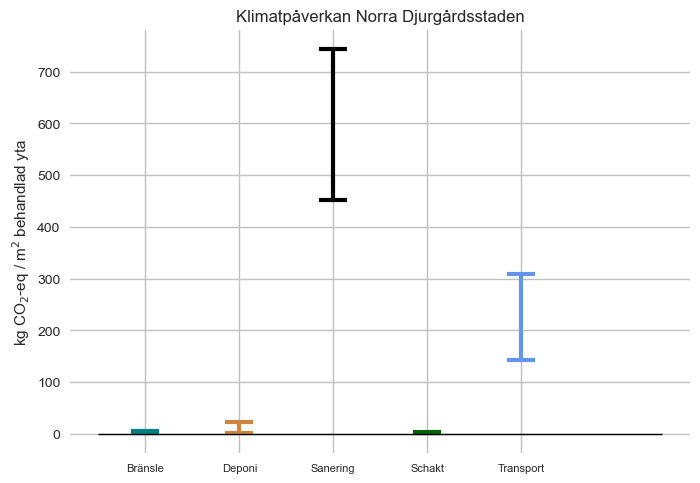

In [49]:
# color: https://matplotlib.org/stable/gallery/color/named_colors.html 
xlabels = ('Bränsle', 'Deponi', 'Sanering', 'Schakt', 'Transport')

fig, ax = plt.subplots()

ax.errorbar(y=Alla_C_Insitu_med, x=3, yerr = Alla_C_Insitu_e, capsize=10, elinewidth=3, markeredgewidth=3, color='black')

ax.errorbar(y=Alla_C_Transport_med, x=5, yerr = Alla_C_Transport_e, capsize=10, elinewidth=3, markeredgewidth=3, color='cornflowerblue')

ax.errorbar(y=Alla_C_Schakt_med, x=4, yerr = Alla_C_Schakt_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkgreen')

ax.errorbar(y=Alla_C_Deponi_med, x=2, yerr = Alla_C_Deponi_e, capsize=10, elinewidth=3, markeredgewidth=3, color='peru')

ax.errorbar(y=Alla_C_Bransle_med, x=1, yerr = Alla_C_Bransle_e, capsize=10, elinewidth=3, markeredgewidth=3, color='teal')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=1, color='black')

ax.set_title('Klimatpåverkan Norra Djurgårdsstaden')
ax.set_xticks((1,2,3,4,5))
ax.set_xticklabels(xlabels, fontsize=8)
ax.set_ylabel(climate_label)

In [50]:
fig.savefig('Climate', dpi=600, bbox_inches='tight')

In [51]:
Alla_A_Insitu_min, Alla_A_Insitu_max, Alla_A_Insitu_med, Alla_A_Insitu_e = calcMinMaxMedianError(Alla_A_Insitu_Y, a_string)
Alla_A_Transport_min, Alla_A_Transport_max, Alla_A_Transport_med, Alla_A_Transport_e = calcMinMaxMedianError(Alla_A_Transport_Y, a_string)
Alla_A_Schakt_min, Alla_A_Schakt_max, Alla_A_Schakt_med, Alla_A_Schakt_e = calcMinMaxMedianError(Alla_A_Schakt_Y, a_string)
Alla_A_Deponi_min, Alla_A_Deponi_max, Alla_A_Deponi_med, Alla_A_Deponi_e = calcMinMaxMedianError(Alla_A_Deponi_Y, a_string)
Alla_A_Bransle_min, Alla_A_Bransle_max, Alla_A_Bransle_med, Alla_A_Bransle_e = calcMinMaxMedianError(Alla_A_Bransle_Y, a_string)


Text(0, 0.5, 'kg SO$_{2}$-eq / m$^{2}$ behandlad yta')

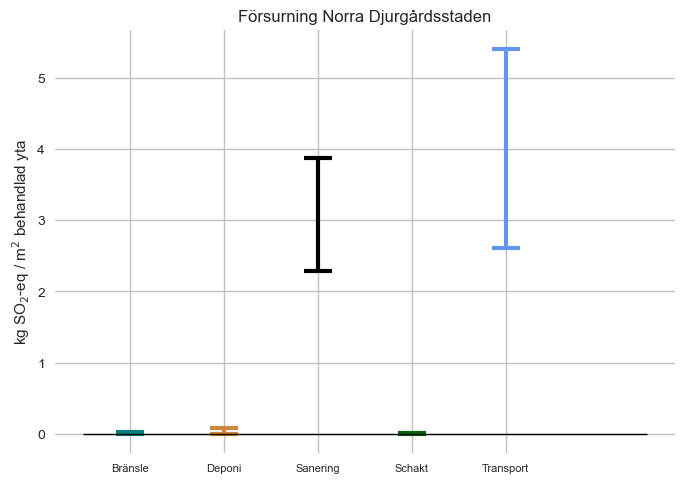

In [52]:
# color: https://matplotlib.org/stable/gallery/color/named_colors.html 
xlabels = ('Bränsle', 'Deponi', 'Sanering', 'Schakt', 'Transport')

fig, ax = plt.subplots()

ax.errorbar(y=Alla_A_Insitu_med, x=3, yerr = Alla_A_Insitu_e, capsize=10, elinewidth=3, markeredgewidth=3, color='black')

ax.errorbar(y=Alla_A_Transport_med, x=5, yerr = Alla_A_Transport_e, capsize=10, elinewidth=3, markeredgewidth=3, color='cornflowerblue')

ax.errorbar(y=Alla_A_Schakt_med, x=4, yerr = Alla_A_Schakt_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkgreen')

ax.errorbar(y=Alla_A_Deponi_med, x=2, yerr = Alla_A_Deponi_e, capsize=10, elinewidth=3, markeredgewidth=3, color='peru')

ax.errorbar(y=Alla_A_Bransle_med, x=1, yerr = Alla_A_Bransle_e, capsize=10, elinewidth=3, markeredgewidth=3, color='teal')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=1, color='black')

ax.set_title('Försurning Norra Djurgårdsstaden')
ax.set_xticks((1,2,3,4,5))
ax.set_xticklabels(xlabels, fontsize=8)
ax.set_ylabel(acid_label)

In [53]:
fig.savefig('Acidification', dpi=600, bbox_inches='tight')

In [54]:
Alla_EF_Insitu_min, Alla_EF_Insitu_max, Alla_EF_Insitu_med, Alla_EF_Insitu_e = calcMinMaxMedianError(Alla_EF_Insitu_Y, ef_string)
Alla_EF_Transport_min, Alla_EF_Transport_max, Alla_EF_Transport_med, Alla_EF_Transport_e = calcMinMaxMedianError(Alla_EF_Transport_Y, ef_string)
Alla_EF_Schakt_min, Alla_EF_Schakt_max, Alla_EF_Schakt_med, Alla_EF_Schakt_e = calcMinMaxMedianError(Alla_EF_Schakt_Y, ef_string)
Alla_EF_Deponi_min, Alla_EF_Deponi_max, Alla_EF_Deponi_med, Alla_EF_Deponi_e = calcMinMaxMedianError(Alla_EF_Deponi_Y, ef_string)
Alla_EF_Bransle_min, Alla_EF_Bransle_max, Alla_EF_Bransle_med, Alla_EF_Bransle_e = calcMinMaxMedianError(Alla_EF_Bransle_Y, ef_string)


Text(0, 0.5, 'kg P-eq / m$^{2}$ behandlad yta')

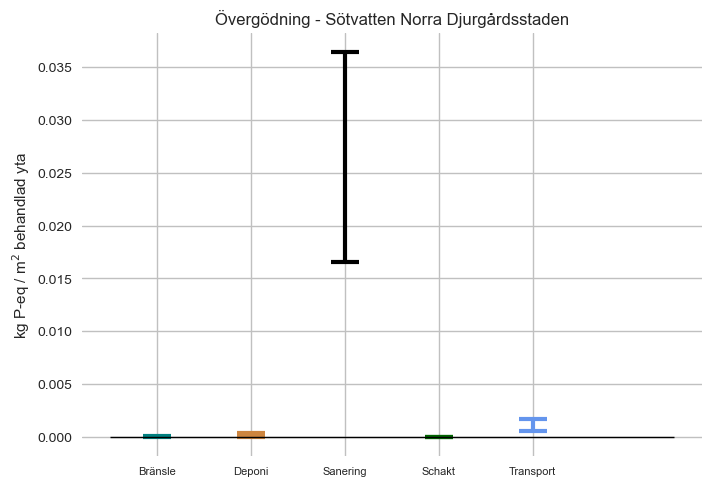

In [55]:
# color: https://matplotlib.org/stable/gallery/color/named_colors.html 
xlabels = ('Bränsle', 'Deponi', 'Sanering', 'Schakt', 'Transport')

fig, ax = plt.subplots()

ax.errorbar(y=Alla_EF_Insitu_med, x=3, yerr = Alla_EF_Insitu_e, capsize=10, elinewidth=3, markeredgewidth=3, color='black')

ax.errorbar(y=Alla_EF_Transport_med, x=5, yerr = Alla_EF_Transport_e, capsize=10, elinewidth=3, markeredgewidth=3, color='cornflowerblue')

ax.errorbar(y=Alla_EF_Schakt_med, x=4, yerr = Alla_EF_Schakt_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkgreen')

ax.errorbar(y=Alla_EF_Deponi_med, x=2, yerr = Alla_EF_Deponi_e, capsize=10, elinewidth=3, markeredgewidth=3, color='peru')

ax.errorbar(y=Alla_EF_Bransle_med, x=1, yerr = Alla_EF_Bransle_e, capsize=10, elinewidth=3, markeredgewidth=3, color='teal')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=1, color='black')

ax.set_title('Övergödning - Sötvatten Norra Djurgårdsstaden')
ax.set_xticks((1,2,3,4,5))
ax.set_xticklabels(xlabels, fontsize=8)
ax.set_ylabel(ef_label)

In [56]:
fig.savefig('Eutrofresh', dpi=600, bbox_inches='tight')

In [57]:
Alla_EM_Insitu_min, Alla_EM_Insitu_max, Alla_EM_Insitu_med, Alla_EM_Insitu_e = calcMinMaxMedianError(Alla_EM_Insitu_Y, em_string)
Alla_EM_Transport_min, Alla_EM_Transport_max, Alla_EM_Transport_med, Alla_EM_Transport_e = calcMinMaxMedianError(Alla_EM_Transport_Y, em_string)
Alla_EM_Schakt_min, Alla_EM_Schakt_max, Alla_EM_Schakt_med, Alla_EM_Schakt_e = calcMinMaxMedianError(Alla_EM_Schakt_Y, em_string)
Alla_EM_Deponi_min, Alla_EM_Deponi_max, Alla_EM_Deponi_med, Alla_EM_Deponi_e = calcMinMaxMedianError(Alla_EM_Deponi_Y, em_string)
Alla_EM_Bransle_min, Alla_EM_Bransle_max, Alla_EM_Bransle_med, Alla_EM_Bransle_e = calcMinMaxMedianError(Alla_EM_Bransle_Y, em_string)


Text(0, 0.5, 'kg N-eq / m$^{2}$ behandlad yta')

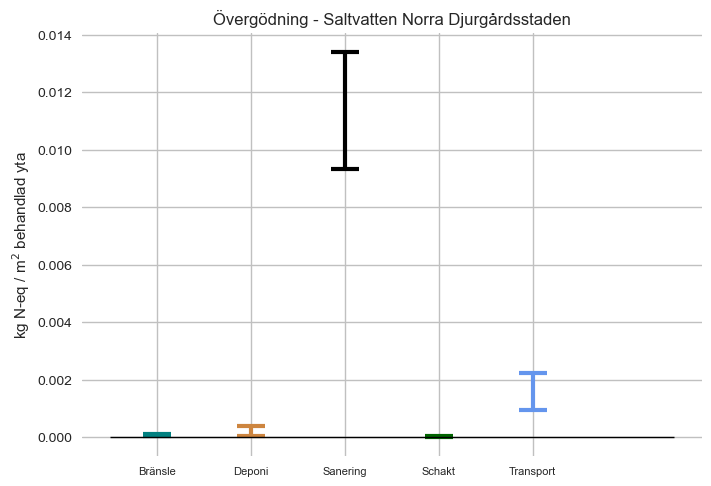

In [58]:
# color: https://matplotlib.org/stable/gallery/color/named_colors.html 
xlabels = ('Bränsle', 'Deponi', 'Sanering', 'Schakt', 'Transport')

fig, ax = plt.subplots()

ax.errorbar(y=Alla_EM_Insitu_med, x=3, yerr = Alla_EM_Insitu_e, capsize=10, elinewidth=3, markeredgewidth=3, color='black')

ax.errorbar(y=Alla_EM_Transport_med, x=5, yerr = Alla_EM_Transport_e, capsize=10, elinewidth=3, markeredgewidth=3, color='cornflowerblue')

ax.errorbar(y=Alla_EM_Schakt_med, x=4, yerr = Alla_EM_Schakt_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkgreen')

ax.errorbar(y=Alla_EM_Deponi_med, x=2, yerr = Alla_EM_Deponi_e, capsize=10, elinewidth=3, markeredgewidth=3, color='peru')

ax.errorbar(y=Alla_EM_Bransle_med, x=1, yerr = Alla_EM_Bransle_e, capsize=10, elinewidth=3, markeredgewidth=3, color='teal')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=1, color='black')

ax.set_title('Övergödning - Saltvatten Norra Djurgårdsstaden')
ax.set_xticks((1,2,3,4,5))
ax.set_xticklabels(xlabels, fontsize=8)
ax.set_ylabel(em_label)

In [59]:
fig.savefig('Eutromarine', dpi=600, bbox_inches='tight')

In [60]:
Alla_M_Insitu_min, Alla_M_Insitu_max, Alla_M_Insitu_med, Alla_M_Insitu_e = calcMinMaxMedianError(Alla_M_Insitu_Y, m_string)
Alla_M_Transport_min, Alla_M_Transport_max, Alla_M_Transport_med, Alla_M_Transport_e = calcMinMaxMedianError(Alla_M_Transport_Y, m_string)
Alla_M_Schakt_min, Alla_M_Schakt_max, Alla_M_Schakt_med, Alla_M_Schakt_e = calcMinMaxMedianError(Alla_M_Schakt_Y, m_string)
Alla_M_Deponi_min, Alla_M_Deponi_max, Alla_M_Deponi_med, Alla_M_Deponi_e = calcMinMaxMedianError(Alla_M_Deponi_Y, m_string)
Alla_M_Bransle_min, Alla_M_Bransle_max, Alla_M_Bransle_med, Alla_M_Bransle_e = calcMinMaxMedianError(Alla_M_Bransle_Y, m_string)


Text(0, 0.5, 'kg Cu-eq / m$^{2}$ behandlad yta')

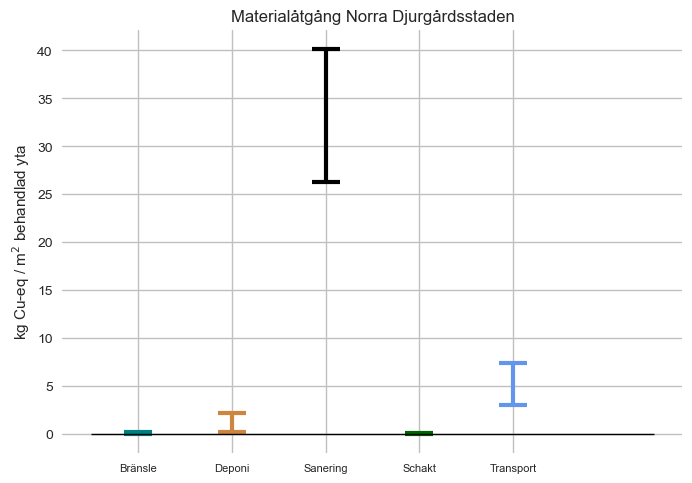

In [61]:
# color: https://matplotlib.org/stable/gallery/color/named_colors.html 
xlabels = ('Bränsle', 'Deponi', 'Sanering', 'Schakt', 'Transport')

fig, ax = plt.subplots()

ax.errorbar(y=Alla_M_Insitu_med, x=3, yerr = Alla_M_Insitu_e, capsize=10, elinewidth=3, markeredgewidth=3, color='black')

ax.errorbar(y=Alla_M_Transport_med, x=5, yerr = Alla_M_Transport_e, capsize=10, elinewidth=3, markeredgewidth=3, color='cornflowerblue')

ax.errorbar(y=Alla_M_Schakt_med, x=4, yerr = Alla_M_Schakt_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkgreen')

ax.errorbar(y=Alla_M_Deponi_med, x=2, yerr = Alla_M_Deponi_e, capsize=10, elinewidth=3, markeredgewidth=3, color='peru')

ax.errorbar(y=Alla_M_Bransle_med, x=1, yerr = Alla_M_Bransle_e, capsize=10, elinewidth=3, markeredgewidth=3, color='teal')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=1, color='black')

ax.set_title('Materialåtgång Norra Djurgårdsstaden')
ax.set_xticks((1,2,3,4,5))
ax.set_xticklabels(xlabels, fontsize=8)
ax.set_ylabel(m_label)

In [62]:
fig.savefig('Material', dpi=600, bbox_inches='tight')

In [63]:
Alla_W_Insitu_min, Alla_W_Insitu_max, Alla_W_Insitu_med, Alla_W_Insitu_e = calcMinMaxMedianError(Alla_W_Insitu_Y, w_string)
Alla_W_Transport_min, Alla_W_Transport_max, Alla_W_Transport_med, Alla_W_Transport_e = calcMinMaxMedianError(Alla_W_Transport_Y, w_string)
Alla_W_Schakt_min, Alla_W_Schakt_max, Alla_W_Schakt_med, Alla_W_Schakt_e = calcMinMaxMedianError(Alla_W_Schakt_Y, w_string)
Alla_W_Deponi_min, Alla_W_Deponi_max, Alla_W_Deponi_med, Alla_W_Deponi_e = calcMinMaxMedianError(Alla_W_Deponi_Y, w_string)
Alla_W_Bransle_min, Alla_W_Bransle_max, Alla_W_Bransle_med, Alla_W_Bransle_e = calcMinMaxMedianError(Alla_W_Bransle_Y, w_string)


Text(0, 0.5, 'm$^{3}$ / m$^{2}$ behandlad yta')

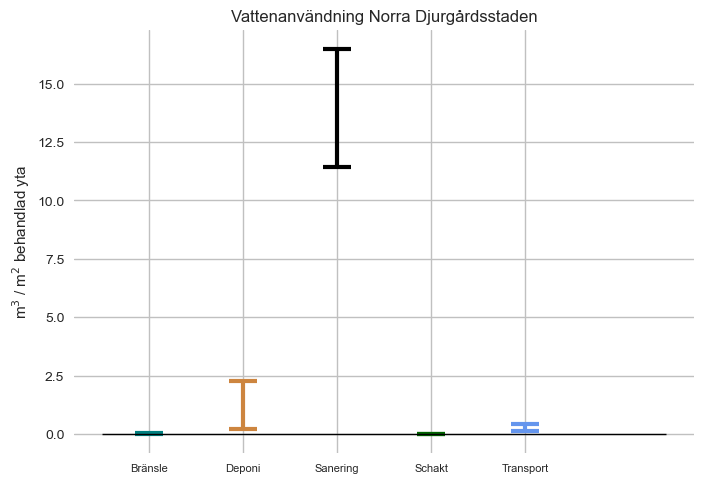

In [64]:
# color: https://matplotlib.org/stable/gallery/color/named_colors.html ###Ev ändra till vatten
xlabels = ('Bränsle', 'Deponi', 'Sanering', 'Schakt', 'Transport')

fig, ax = plt.subplots()

ax.errorbar(y=Alla_W_Insitu_med, x=3, yerr = Alla_W_Insitu_e, capsize=10, elinewidth=3, markeredgewidth=3, color='black')

ax.errorbar(y=Alla_W_Transport_med, x=5, yerr = Alla_W_Transport_e, capsize=10, elinewidth=3, markeredgewidth=3, color='cornflowerblue')

ax.errorbar(y=Alla_W_Schakt_med, x=4, yerr = Alla_W_Schakt_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkgreen')

ax.errorbar(y=Alla_W_Deponi_med, x=2, yerr = Alla_W_Deponi_e, capsize=10, elinewidth=3, markeredgewidth=3, color='peru')

ax.errorbar(y=Alla_W_Bransle_med, x=1, yerr = Alla_W_Bransle_e, capsize=10, elinewidth=3, markeredgewidth=3, color='teal')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=1, color='black')

ax.set_title('Vattenanvändning Norra Djurgårdsstaden')
ax.set_xticks((1,2,3,4,5))
ax.set_xticklabels(xlabels, fontsize=8)
ax.set_ylabel(w_label)

In [65]:
fig.savefig('Wateruse', dpi=600, bbox_inches='tight')

### Tagg 2

In [66]:
#Katergorier: Schakt, Deponi, MLC, Bergskross, KC, SP, AK, ORC, Transport, Bränsle
new_data = conveniently_tag_database_v2(fg, 'label_name2') 

There are 33 items to be tagged, one by one
Do you want to proceed (Y/N) ? Y
Lets proceed! Type 'skip' in order to not tag the given activity or remove existing tag
HVO production and combustion in machines... to be in the group called... ? Bränsle
siktSwitch... to be in the group called... ? Schakt
sodium persulfate production... to be in the group called... ? SP
Transport, lastbil, biodiesel... to be in the group called... ? skip
Gravmaskin... to be in the group called... ? Schakt
dieselSwitch... to be in the group called... ? skip
Landfill infrastructure... to be in the group called... ? Deponi
OxideringKol... to be in the group called... ? AK
Bergskross... to be in the group called... ? Bergskross
NDS wet sieving machine... to be in the group called... ? MLC
Schakt... to be in the group called... ? Schakt
biodiesel... to be in the group called... ? skip
oxideringSwitch... to be in the group called... ? skip
Deponi... to be in the group called... ? Deponi
Oxidering... to be in the g

In [67]:
# manually add/change tags:
# step 1: find act
act_to_tag = findActivity("Transport, lastbil, biodiesel", db_name=fg)

In [68]:
act_to_tag # check that we have it

'Transport, lastbil, biodiesel' (ton kilometer, GLO, None)

In [69]:
act_to_tag['label_name2']='Transport' # change the tag directly for this act
act_to_tag.save() # important! if we don't save, the changes doesn't get registered in the db

In [70]:
# check that the tag is correct
act_to_tag['label_name2']

'Transport'

In [25]:
Alla2_C = runAlgebraicGraphTraversal([fu1], IPCC, label="label_name2", default_tag="Annat",
    fg_databases=[fg], bio2tech=True, parent4other=True) 
Alla2_A = runAlgebraicGraphTraversal([fu1], acid, label="label_name2", default_tag="Annat",
    fg_databases=[fg], bio2tech=True, parent4other=True)
Alla2_EF = runAlgebraicGraphTraversal([fu1], eutrofresh, label="label_name2", default_tag="Annat",
    fg_databases=[fg], bio2tech=True, parent4other=True)
Alla2_EM = runAlgebraicGraphTraversal([fu1], eutromarine, label="label_name2", default_tag="Annat",
    fg_databases=[fg], bio2tech=True, parent4other=True)
Alla2_M = runAlgebraicGraphTraversal([fu1], material, label="label_name2", default_tag="Annat",
    fg_databases=[fg], bio2tech=True, parent4other=True)
Alla2_W = runAlgebraicGraphTraversal([fu1], water, label="label_name2", default_tag="Annat",
    fg_databases=[fg], bio2tech=True, parent4other=True)

Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' 

Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' 

Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' 

In [26]:
Alla2_C_Transport_Y = _compute_stochastics([createLambda(Alla2_C[list(fu1.keys())[0]]['agg_graph']['Transport'][0])], 
                                          IPCC, params)
Alla2_A_Transport_Y = _compute_stochastics([createLambda(Alla2_A[list(fu1.keys())[0]]['agg_graph']['Transport'][0])], 
                                          acid, params)
Alla2_EF_Transport_Y = _compute_stochastics([createLambda(Alla2_EF[list(fu1.keys())[0]]['agg_graph']['Transport'][0])], 
                                          eutrofresh, params)
Alla2_EM_Transport_Y = _compute_stochastics([createLambda(Alla2_EM[list(fu1.keys())[0]]['agg_graph']['Transport'][0])], 
                                          eutromarine, params)
Alla2_M_Transport_Y = _compute_stochastics([createLambda(Alla2_M[list(fu1.keys())[0]]['agg_graph']['Transport'][0])], 
                                          material, params)
Alla2_W_Transport_Y = _compute_stochastics([createLambda(Alla2_W[list(fu1.keys())[0]]['agg_graph']['Transport'][0])], 
                                          water, params)

In [27]:
Alla2_C_MLC_Y = _compute_stochastics([createLambda(Alla2_C[list(fu1.keys())[0]]['agg_graph']['MLC'][0])], 
                                          IPCC, params)
Alla2_A_MLC_Y = _compute_stochastics([createLambda(Alla2_A[list(fu1.keys())[0]]['agg_graph']['MLC'][0])], 
                                          acid, params)
Alla2_EF_MLC_Y = _compute_stochastics([createLambda(Alla2_EF[list(fu1.keys())[0]]['agg_graph']['MLC'][0])], 
                                          eutrofresh, params)
Alla2_EM_MLC_Y = _compute_stochastics([createLambda(Alla2_EM[list(fu1.keys())[0]]['agg_graph']['MLC'][0])], 
                                          eutromarine, params)
Alla2_M_MLC_Y = _compute_stochastics([createLambda(Alla2_M[list(fu1.keys())[0]]['agg_graph']['MLC'][0])], 
                                          material, params)
Alla2_W_MLC_Y = _compute_stochastics([createLambda(Alla2_W[list(fu1.keys())[0]]['agg_graph']['MLC'][0])], 
                                          water, params)

In [28]:
Alla2_C_Schakt_Y = _compute_stochastics([createLambda(Alla2_C[list(fu1.keys())[0]]['agg_graph']['Schakt'][0])], 
                                          IPCC, params)
Alla2_A_Schakt_Y = _compute_stochastics([createLambda(Alla2_A[list(fu1.keys())[0]]['agg_graph']['Schakt'][0])], 
                                          acid, params)
Alla2_EF_Schakt_Y = _compute_stochastics([createLambda(Alla2_EF[list(fu1.keys())[0]]['agg_graph']['Schakt'][0])], 
                                          eutrofresh, params)
Alla2_EM_Schakt_Y = _compute_stochastics([createLambda(Alla2_EM[list(fu1.keys())[0]]['agg_graph']['Schakt'][0])], 
                                          eutromarine, params)
Alla2_M_Schakt_Y = _compute_stochastics([createLambda(Alla2_M[list(fu1.keys())[0]]['agg_graph']['Schakt'][0])], 
                                          material, params)
Alla2_W_Schakt_Y = _compute_stochastics([createLambda(Alla2_W[list(fu1.keys())[0]]['agg_graph']['Schakt'][0])], 
                                          water, params)

In [29]:
Alla2_C_Deponi_Y = _compute_stochastics([createLambda(Alla2_C[list(fu1.keys())[0]]['agg_graph']['Deponi'][0])], 
                                          IPCC, params)
Alla2_A_Deponi_Y = _compute_stochastics([createLambda(Alla2_A[list(fu1.keys())[0]]['agg_graph']['Deponi'][0])], 
                                          acid, params)
Alla2_EF_Deponi_Y = _compute_stochastics([createLambda(Alla2_EF[list(fu1.keys())[0]]['agg_graph']['Deponi'][0])], 
                                          eutrofresh, params)
Alla2_EM_Deponi_Y = _compute_stochastics([createLambda(Alla2_EM[list(fu1.keys())[0]]['agg_graph']['Deponi'][0])], 
                                          eutromarine, params)
Alla2_M_Deponi_Y = _compute_stochastics([createLambda(Alla2_M[list(fu1.keys())[0]]['agg_graph']['Deponi'][0])], 
                                          material, params)
Alla2_W_Deponi_Y = _compute_stochastics([createLambda(Alla2_W[list(fu1.keys())[0]]['agg_graph']['Deponi'][0])], 
                                          water, params)

In [30]:
Alla2_C_Bränsle_Y = _compute_stochastics([createLambda(Alla2_C[list(fu1.keys())[0]]['agg_graph']['Bränsle'][0])], 
                                          IPCC, params)
Alla2_A_Bränsle_Y = _compute_stochastics([createLambda(Alla2_A[list(fu1.keys())[0]]['agg_graph']['Bränsle'][0])], 
                                          acid, params)
Alla2_EF_Bränsle_Y = _compute_stochastics([createLambda(Alla2_EF[list(fu1.keys())[0]]['agg_graph']['Bränsle'][0])], 
                                          eutrofresh, params)
Alla2_EM_Bränsle_Y = _compute_stochastics([createLambda(Alla2_EM[list(fu1.keys())[0]]['agg_graph']['Bränsle'][0])], 
                                          eutromarine, params)
Alla2_M_Bränsle_Y = _compute_stochastics([createLambda(Alla2_M[list(fu1.keys())[0]]['agg_graph']['Bränsle'][0])], 
                                          material, params)
Alla2_W_Bränsle_Y = _compute_stochastics([createLambda(Alla2_W[list(fu1.keys())[0]]['agg_graph']['Bränsle'][0])], 
                                          water, params)

In [31]:
Alla2_C_Bergskross_Y = _compute_stochastics([createLambda(Alla2_C[list(fu1.keys())[0]]['agg_graph']['Bergskross'][0])], 
                                          IPCC, params)
Alla2_A_Bergskross_Y = _compute_stochastics([createLambda(Alla2_A[list(fu1.keys())[0]]['agg_graph']['Bergskross'][0])], 
                                          acid, params)
Alla2_EF_Bergskross_Y = _compute_stochastics([createLambda(Alla2_EF[list(fu1.keys())[0]]['agg_graph']['Bergskross'][0])], 
                                          eutrofresh, params)
Alla2_EM_Bergskross_Y = _compute_stochastics([createLambda(Alla2_EM[list(fu1.keys())[0]]['agg_graph']['Bergskross'][0])], 
                                          eutromarine, params)
Alla2_M_Bergskross_Y = _compute_stochastics([createLambda(Alla2_M[list(fu1.keys())[0]]['agg_graph']['Bergskross'][0])], 
                                          material, params)
Alla2_W_Bergskross_Y = _compute_stochastics([createLambda(Alla2_W[list(fu1.keys())[0]]['agg_graph']['Bergskross'][0])], 
                                          water, params)

In [32]:
Alla2_C_KC_Y = _compute_stochastics([createLambda(Alla2_C[list(fu1.keys())[0]]['agg_graph']['KC'][0])], 
                                          IPCC, params)
Alla2_A_KC_Y = _compute_stochastics([createLambda(Alla2_A[list(fu1.keys())[0]]['agg_graph']['KC'][0])], 
                                          acid, params)
Alla2_EF_KC_Y = _compute_stochastics([createLambda(Alla2_EF[list(fu1.keys())[0]]['agg_graph']['KC'][0])], 
                                          eutrofresh, params)
Alla2_EM_KC_Y = _compute_stochastics([createLambda(Alla2_EM[list(fu1.keys())[0]]['agg_graph']['KC'][0])], 
                                          eutromarine, params)
Alla2_M_KC_Y = _compute_stochastics([createLambda(Alla2_M[list(fu1.keys())[0]]['agg_graph']['KC'][0])], 
                                          material, params)
Alla2_W_KC_Y = _compute_stochastics([createLambda(Alla2_W[list(fu1.keys())[0]]['agg_graph']['KC'][0])], 
                                          water, params)

In [33]:
Alla2_C_SP_Y = _compute_stochastics([createLambda(Alla2_C[list(fu1.keys())[0]]['agg_graph']['SP'][0])], 
                                          IPCC, params)
Alla2_A_SP_Y = _compute_stochastics([createLambda(Alla2_A[list(fu1.keys())[0]]['agg_graph']['SP'][0])], 
                                          acid, params)
Alla2_EF_SP_Y = _compute_stochastics([createLambda(Alla2_EF[list(fu1.keys())[0]]['agg_graph']['SP'][0])], 
                                          eutrofresh, params)
Alla2_EM_SP_Y = _compute_stochastics([createLambda(Alla2_EM[list(fu1.keys())[0]]['agg_graph']['SP'][0])], 
                                          eutromarine, params)
Alla2_M_SP_Y = _compute_stochastics([createLambda(Alla2_M[list(fu1.keys())[0]]['agg_graph']['SP'][0])], 
                                          material, params)
Alla2_W_SP_Y = _compute_stochastics([createLambda(Alla2_W[list(fu1.keys())[0]]['agg_graph']['SP'][0])], 
                                          water, params)

In [34]:
Alla2_C_AK_Y = _compute_stochastics([createLambda(Alla2_C[list(fu1.keys())[0]]['agg_graph']['AK'][0])], 
                                          IPCC, params)
Alla2_A_AK_Y = _compute_stochastics([createLambda(Alla2_A[list(fu1.keys())[0]]['agg_graph']['AK'][0])], 
                                          acid, params)
Alla2_EF_AK_Y = _compute_stochastics([createLambda(Alla2_EF[list(fu1.keys())[0]]['agg_graph']['AK'][0])], 
                                          eutrofresh, params)
Alla2_EM_AK_Y = _compute_stochastics([createLambda(Alla2_EM[list(fu1.keys())[0]]['agg_graph']['AK'][0])], 
                                          eutromarine, params)
Alla2_M_AK_Y = _compute_stochastics([createLambda(Alla2_M[list(fu1.keys())[0]]['agg_graph']['AK'][0])], 
                                          material, params)
Alla2_W_AK_Y = _compute_stochastics([createLambda(Alla2_W[list(fu1.keys())[0]]['agg_graph']['AK'][0])], 
                                          water, params)

In [35]:
Alla2_C_ORC_Y = _compute_stochastics([createLambda(Alla2_C[list(fu1.keys())[0]]['agg_graph']['ORC'][0])], 
                                          IPCC, params)
Alla2_A_ORC_Y = _compute_stochastics([createLambda(Alla2_A[list(fu1.keys())[0]]['agg_graph']['ORC'][0])], 
                                          acid, params)
Alla2_EF_ORC_Y = _compute_stochastics([createLambda(Alla2_EF[list(fu1.keys())[0]]['agg_graph']['ORC'][0])], 
                                          eutrofresh, params)
Alla2_EM_ORC_Y = _compute_stochastics([createLambda(Alla2_EM[list(fu1.keys())[0]]['agg_graph']['ORC'][0])], 
                                          eutromarine, params)
Alla2_M_ORC_Y = _compute_stochastics([createLambda(Alla2_M[list(fu1.keys())[0]]['agg_graph']['ORC'][0])], 
                                          material, params)
Alla2_W_ORC_Y = _compute_stochastics([createLambda(Alla2_W[list(fu1.keys())[0]]['agg_graph']['ORC'][0])], 
                                          water, params)

In [36]:
c_string = 'climate change: total (excl. biogenic CO2) - global warming potential (GWP100)'
a_string = 'acidification: terrestrial no LT - terrestrial acidification potential (TAP) no LT'
ef_string = 'eutrophication: freshwater no LT - freshwater eutrophication potential (FEP) no LT'
em_string = 'eutrophication: marine no LT - marine eutrophication potential (MEP) no LT'
m_string = 'material resources: metals/minerals no LT - surplus ore potential (SOP) no LT'
w_string = 'water use no LT - water consumption potential (WCP) no LT'

In [37]:
climate_label = 'kg CO'+'$_{2}$' +'-eq / m' +'$^{2}$' +' behandlad yta'
acid_label = 'kg SO'+'$_{2}$' +'-eq / m' +'$^{2}$' +' behandlad yta'
ef_label = 'kg P'+'-eq / m' +'$^{2}$' +' behandlad yta'
em_label = 'kg N'+'-eq / m' +'$^{2}$' +' behandlad yta'
m_label = 'kg Cu'+'-eq / m' +'$^{2}$' +' behandlad yta'
w_label = 'm' +'$^{3}$ / m' +'$^{2}$' +' behandlad yta'

In [84]:
Alla2_C_MLC_min, Alla2_C_MLC_max, Alla2_C_MLC_med, Alla2_C_MLC_e = calcMinMaxMedianError(Alla2_C_MLC_Y, c_string)
Alla2_C_Transport_min, Alla2_C_Transport_max, Alla2_C_Transport_med, Alla2_C_Transport_e = calcMinMaxMedianError(Alla2_C_Transport_Y, c_string)
Alla2_C_Schakt_min, Alla2_C_Schakt_max, Alla2_C_Schakt_med, Alla2_C_Schakt_e = calcMinMaxMedianError(Alla2_C_Schakt_Y, c_string)
Alla2_C_Deponi_min, Alla2_C_Deponi_max, Alla2_C_Deponi_med, Alla2_C_Deponi_e = calcMinMaxMedianError(Alla2_C_Deponi_Y, c_string)
Alla2_C_Bergskross_min, Alla2_C_Bergskross_max, Alla2_C_Bergskross_med, Alla2_C_Bergskross_e = calcMinMaxMedianError(Alla2_C_Bergskross_Y, c_string)
Alla2_C_KC_min, Alla2_C_KC_max, Alla2_C_KC_med, Alla2_C_KC_e = calcMinMaxMedianError(Alla2_C_KC_Y, c_string)
Alla2_C_SP_min, Alla2_C_SP_max, Alla2_C_SP_med, Alla2_C_SP_e = calcMinMaxMedianError(Alla2_C_SP_Y, c_string)
Alla2_C_AK_min, Alla2_C_AK_max, Alla2_C_AK_med, Alla2_C_AK_e = calcMinMaxMedianError(Alla2_C_AK_Y, c_string)
Alla2_C_ORC_min, Alla2_C_ORC_max, Alla2_C_ORC_med, Alla2_C_ORC_e = calcMinMaxMedianError(Alla2_C_ORC_Y, c_string)
Alla2_C_Bränsle_min, Alla2_C_Bränsle_max, Alla2_C_Bränsle_med, Alla2_C_Bränsle_e = calcMinMaxMedianError(Alla2_C_Bränsle_Y, c_string)


Text(0, 0.5, 'kg CO$_{2}$-eq / m$^{2}$ behandlad yta')

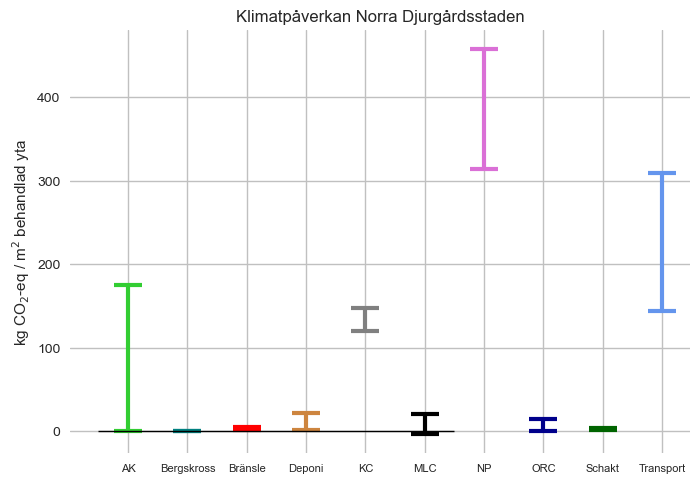

In [85]:
# color: https://matplotlib.org/stable/gallery/color/named_colors.html 
xlabels = ('AK', 'Bergskross', 'Bränsle', 'Deponi', 'KC', 'MLC', 'NP', 'ORC', 'Schakt', 'Transport')

fig, ax = plt.subplots()

ax.errorbar(y=Alla2_C_MLC_med, x=6, yerr = Alla2_C_MLC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='black')
ax.errorbar(y=Alla2_C_Transport_med, x=10, yerr = Alla2_C_Transport_e, capsize=10, elinewidth=3, markeredgewidth=3, color='cornflowerblue')
ax.errorbar(y=Alla2_C_Schakt_med, x=9, yerr = Alla2_C_Schakt_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkgreen')
ax.errorbar(y=Alla2_C_Deponi_med, x=4, yerr = Alla2_C_Deponi_e, capsize=10, elinewidth=3, markeredgewidth=3, color='peru')
ax.errorbar(y=Alla2_C_Bergskross_med, x=2, yerr = Alla2_C_Bergskross_e, capsize=10, elinewidth=3, markeredgewidth=3, color='teal')
ax.errorbar(y=Alla2_C_KC_med, x=5, yerr = Alla2_C_KC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='gray')
ax.errorbar(y=Alla2_C_SP_med, x=7, yerr = Alla2_C_SP_e, capsize=10, elinewidth=3, markeredgewidth=3, color='orchid')
ax.errorbar(y=Alla2_C_AK_med, x=1, yerr = Alla2_C_AK_e, capsize=10, elinewidth=3, markeredgewidth=3, color='limegreen')
ax.errorbar(y=Alla2_C_ORC_med, x=8, yerr = Alla2_C_ORC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkblue')
ax.errorbar(y=Alla2_C_Bränsle_med, x=3, yerr = Alla2_C_Bränsle_e, capsize=10, elinewidth=3, markeredgewidth=3, color='red')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=1, color='black')

ax.set_title('Klimatpåverkan Norra Djurgårdsstaden')
ax.set_xticks((1,2,3,4,5,6,7,8,9,10))
ax.set_xticklabels(xlabels, fontsize=8)
ax.set_ylabel(climate_label)

In [86]:
fig.savefig('Climate-May', dpi=600, bbox_inches='tight')

In [87]:
Alla2_A_MLC_min, Alla2_A_MLC_max, Alla2_A_MLC_med, Alla2_A_MLC_e = calcMinMaxMedianError(Alla2_A_MLC_Y, a_string)
Alla2_A_Transport_min, Alla2_A_Transport_max, Alla2_A_Transport_med, Alla2_A_Transport_e = calcMinMaxMedianError(Alla2_A_Transport_Y, a_string)
Alla2_A_Schakt_min, Alla2_A_Schakt_max, Alla2_A_Schakt_med, Alla2_A_Schakt_e = calcMinMaxMedianError(Alla2_A_Schakt_Y, a_string)
Alla2_A_Deponi_min, Alla2_A_Deponi_max, Alla2_A_Deponi_med, Alla2_A_Deponi_e = calcMinMaxMedianError(Alla2_A_Deponi_Y, a_string)
Alla2_A_Bergskross_min, Alla2_A_Bergskross_max, Alla2_A_Bergskross_med, Alla2_A_Bergskross_e = calcMinMaxMedianError(Alla2_A_Bergskross_Y, a_string)
Alla2_A_KC_min, Alla2_A_KC_max, Alla2_A_KC_med, Alla2_A_KC_e = calcMinMaxMedianError(Alla2_A_KC_Y, a_string)
Alla2_A_SP_min, Alla2_A_SP_max, Alla2_A_SP_med, Alla2_A_SP_e = calcMinMaxMedianError(Alla2_A_SP_Y, a_string)
Alla2_A_AK_min, Alla2_A_AK_max, Alla2_A_AK_med, Alla2_A_AK_e = calcMinMaxMedianError(Alla2_A_AK_Y, a_string)
Alla2_A_ORC_min, Alla2_A_ORC_max, Alla2_A_ORC_med, Alla2_A_ORC_e = calcMinMaxMedianError(Alla2_A_ORC_Y, a_string)
Alla2_A_Bränsle_min, Alla2_A_Bränsle_max, Alla2_A_Bränsle_med, Alla2_A_Bränsle_e = calcMinMaxMedianError(Alla2_A_Bränsle_Y, a_string)


Text(0, 0.5, 'kg SO$_{2}$-eq / m$^{2}$ behandlad yta')

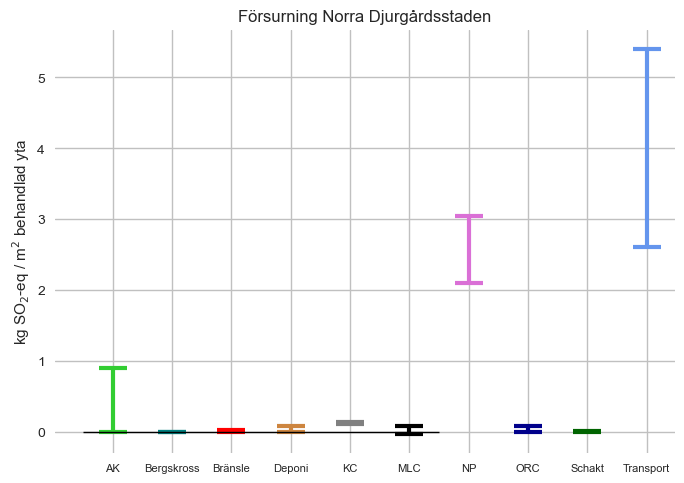

In [88]:
# color: https://matplotlib.org/stable/gallery/color/named_colors.html 
xlabels = ('AK', 'Bergskross', 'Bränsle', 'Deponi', 'KC', 'MLC', 'NP', 'ORC', 'Schakt', 'Transport')

fig, ax = plt.subplots()

ax.errorbar(y=Alla2_A_MLC_med, x=6, yerr = Alla2_A_MLC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='black')
ax.errorbar(y=Alla2_A_Transport_med, x=10, yerr = Alla2_A_Transport_e, capsize=10, elinewidth=3, markeredgewidth=3, color='cornflowerblue')
ax.errorbar(y=Alla2_A_Schakt_med, x=9, yerr = Alla2_A_Schakt_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkgreen')
ax.errorbar(y=Alla2_A_Deponi_med, x=4, yerr = Alla2_A_Deponi_e, capsize=10, elinewidth=3, markeredgewidth=3, color='peru')
ax.errorbar(y=Alla2_A_Bergskross_med, x=2, yerr = Alla2_A_Bergskross_e, capsize=10, elinewidth=3, markeredgewidth=3, color='teal')
ax.errorbar(y=Alla2_A_KC_med, x=5, yerr = Alla2_A_KC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='gray')
ax.errorbar(y=Alla2_A_SP_med, x=7, yerr = Alla2_A_SP_e, capsize=10, elinewidth=3, markeredgewidth=3, color='orchid')
ax.errorbar(y=Alla2_A_AK_med, x=1, yerr = Alla2_A_AK_e, capsize=10, elinewidth=3, markeredgewidth=3, color='limegreen')
ax.errorbar(y=Alla2_A_ORC_med, x=8, yerr = Alla2_A_ORC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkblue')
ax.errorbar(y=Alla2_A_Bränsle_med, x=3, yerr = Alla2_A_Bränsle_e, capsize=10, elinewidth=3, markeredgewidth=3, color='red')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=1, color='black')

ax.set_title('Försurning Norra Djurgårdsstaden')
ax.set_xticks((1,2,3,4,5,6,7,8,9,10))
ax.set_xticklabels(xlabels, fontsize=8)
ax.set_ylabel(acid_label)

In [89]:
fig.savefig('Acidification-May', dpi=600, bbox_inches='tight')

In [90]:
Alla2_EF_MLC_min, Alla2_EF_MLC_max, Alla2_EF_MLC_med, Alla2_EF_MLC_e = calcMinMaxMedianError(Alla2_EF_MLC_Y, ef_string)
Alla2_EF_Transport_min, Alla2_EF_Transport_max, Alla2_EF_Transport_med, Alla2_EF_Transport_e = calcMinMaxMedianError(Alla2_EF_Transport_Y, ef_string)
Alla2_EF_Schakt_min, Alla2_EF_Schakt_max, Alla2_EF_Schakt_med, Alla2_EF_Schakt_e = calcMinMaxMedianError(Alla2_EF_Schakt_Y, ef_string)
Alla2_EF_Deponi_min, Alla2_EF_Deponi_max, Alla2_EF_Deponi_med, Alla2_EF_Deponi_e = calcMinMaxMedianError(Alla2_EF_Deponi_Y, ef_string)
Alla2_EF_Bergskross_min, Alla2_EF_Bergskross_max, Alla2_EF_Bergskross_med, Alla2_EF_Bergskross_e = calcMinMaxMedianError(Alla2_EF_Bergskross_Y, ef_string)
Alla2_EF_KC_min, Alla2_EF_KC_max, Alla2_EF_KC_med, Alla2_EF_KC_e = calcMinMaxMedianError(Alla2_EF_KC_Y, ef_string)
Alla2_EF_SP_min, Alla2_EF_SP_max, Alla2_EF_SP_med, Alla2_EF_SP_e = calcMinMaxMedianError(Alla2_EF_SP_Y, ef_string)
Alla2_EF_AK_min, Alla2_EF_AK_max, Alla2_EF_AK_med, Alla2_EF_AK_e = calcMinMaxMedianError(Alla2_EF_AK_Y, ef_string)
Alla2_EF_ORC_min, Alla2_EF_ORC_max, Alla2_EF_ORC_med, Alla2_EF_ORC_e = calcMinMaxMedianError(Alla2_EF_ORC_Y, ef_string)
Alla2_EF_Bränsle_min, Alla2_EF_Bränsle_max, Alla2_EF_Bränsle_med, Alla2_EF_Bränsle_e = calcMinMaxMedianError(Alla2_EF_Bränsle_Y, ef_string)


Text(0, 0.5, 'kg P-eq / m$^{2}$ behandlad yta')

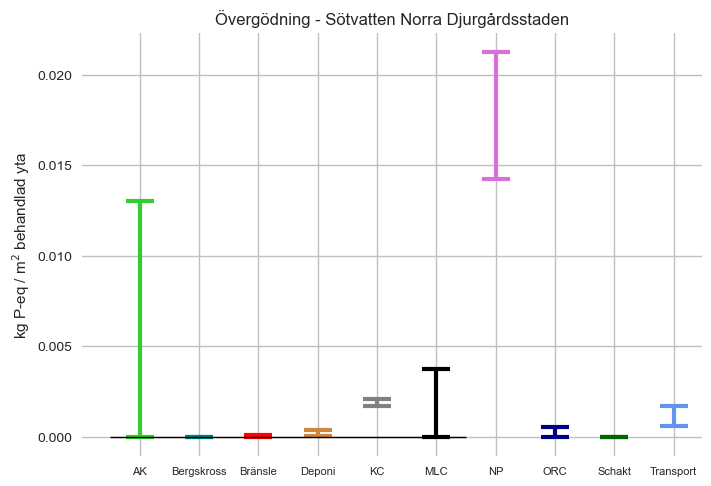

In [91]:
# color: https://matplotlib.org/stable/gallery/color/named_colors.html 
xlabels = ('AK', 'Bergskross', 'Bränsle', 'Deponi', 'KC', 'MLC', 'NP', 'ORC', 'Schakt', 'Transport')

fig, ax = plt.subplots()

ax.errorbar(y=Alla2_EF_MLC_med, x=6, yerr = Alla2_EF_MLC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='black')
ax.errorbar(y=Alla2_EF_Transport_med, x=10, yerr = Alla2_EF_Transport_e, capsize=10, elinewidth=3, markeredgewidth=3, color='cornflowerblue')
ax.errorbar(y=Alla2_EF_Schakt_med, x=9, yerr = Alla2_EF_Schakt_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkgreen')
ax.errorbar(y=Alla2_EF_Deponi_med, x=4, yerr = Alla2_EF_Deponi_e, capsize=10, elinewidth=3, markeredgewidth=3, color='peru')
ax.errorbar(y=Alla2_EF_Bergskross_med, x=2, yerr = Alla2_EF_Bergskross_e, capsize=10, elinewidth=3, markeredgewidth=3, color='teal')
ax.errorbar(y=Alla2_EF_KC_med, x=5, yerr = Alla2_EF_KC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='gray')
ax.errorbar(y=Alla2_EF_SP_med, x=7, yerr = Alla2_EF_SP_e, capsize=10, elinewidth=3, markeredgewidth=3, color='orchid')
ax.errorbar(y=Alla2_EF_AK_med, x=1, yerr = Alla2_EF_AK_e, capsize=10, elinewidth=3, markeredgewidth=3, color='limegreen')
ax.errorbar(y=Alla2_EF_ORC_med, x=8, yerr = Alla2_EF_ORC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkblue')
ax.errorbar(y=Alla2_EF_Bränsle_med, x=3, yerr = Alla2_EF_Bränsle_e, capsize=10, elinewidth=3, markeredgewidth=3, color='red')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=1, color='black')

ax.set_title('Övergödning - Sötvatten Norra Djurgårdsstaden')
ax.set_xticks((1,2,3,4,5,6,7,8,9,10))
ax.set_xticklabels(xlabels, fontsize=8)
ax.set_ylabel(ef_label)

In [92]:
fig.savefig('Eutrofresh-May', dpi=600, bbox_inches='tight')

In [93]:
Alla2_EM_MLC_min, Alla2_EM_MLC_max, Alla2_EM_MLC_med, Alla2_EM_MLC_e = calcMinMaxMedianError(Alla2_EM_MLC_Y, em_string)
Alla2_EM_Transport_min, Alla2_EM_Transport_max, Alla2_EM_Transport_med, Alla2_EM_Transport_e = calcMinMaxMedianError(Alla2_EM_Transport_Y, em_string)
Alla2_EM_Schakt_min, Alla2_EM_Schakt_max, Alla2_EM_Schakt_med, Alla2_EM_Schakt_e = calcMinMaxMedianError(Alla2_EM_Schakt_Y, em_string)
Alla2_EM_Deponi_min, Alla2_EM_Deponi_max, Alla2_EM_Deponi_med, Alla2_EM_Deponi_e = calcMinMaxMedianError(Alla2_EM_Deponi_Y, em_string)
Alla2_EM_Bergskross_min, Alla2_EM_Bergskross_max, Alla2_EM_Bergskross_med, Alla2_EM_Bergskross_e = calcMinMaxMedianError(Alla2_EM_Bergskross_Y, em_string)
Alla2_EM_KC_min, Alla2_EM_KC_max, Alla2_EM_KC_med, Alla2_EM_KC_e = calcMinMaxMedianError(Alla2_EM_KC_Y, em_string)
Alla2_EM_SP_min, Alla2_EM_SP_max, Alla2_EM_SP_med, Alla2_EM_SP_e = calcMinMaxMedianError(Alla2_EM_SP_Y, em_string)
Alla2_EM_AK_min, Alla2_EM_AK_max, Alla2_EM_AK_med, Alla2_EM_AK_e = calcMinMaxMedianError(Alla2_EM_AK_Y, em_string)
Alla2_EM_ORC_min, Alla2_EM_ORC_max, Alla2_EM_ORC_med, Alla2_EM_ORC_e = calcMinMaxMedianError(Alla2_EM_ORC_Y, em_string)
Alla2_EM_Bränsle_min, Alla2_EM_Bränsle_max, Alla2_EM_Bränsle_med, Alla2_EM_Bränsle_e = calcMinMaxMedianError(Alla2_EM_Bränsle_Y, em_string)


Text(0, 0.5, 'kg N-eq / m$^{2}$ behandlad yta')

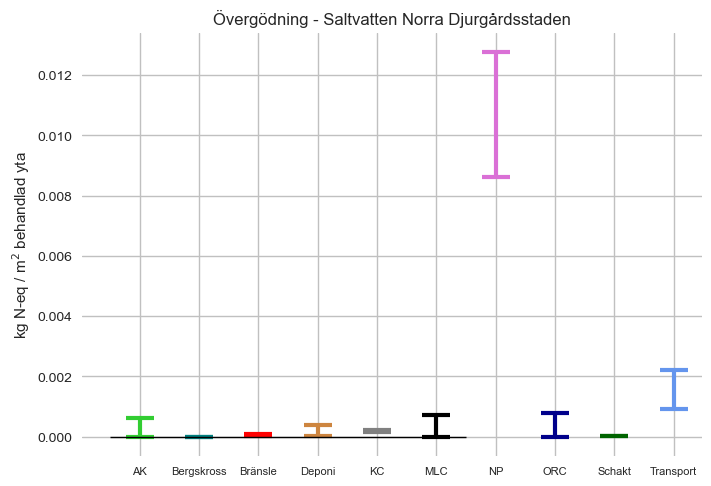

In [95]:
# color: https://matplotlib.org/stable/gallery/color/named_colors.html 
xlabels = ('AK', 'Bergskross', 'Bränsle', 'Deponi', 'KC', 'MLC', 'NP', 'ORC', 'Schakt', 'Transport')

fig, ax = plt.subplots()

ax.errorbar(y=Alla2_EM_MLC_med, x=6, yerr = Alla2_EM_MLC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='black')
ax.errorbar(y=Alla2_EM_Transport_med, x=10, yerr = Alla2_EM_Transport_e, capsize=10, elinewidth=3, markeredgewidth=3, color='cornflowerblue')
ax.errorbar(y=Alla2_EM_Schakt_med, x=9, yerr = Alla2_EM_Schakt_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkgreen')
ax.errorbar(y=Alla2_EM_Deponi_med, x=4, yerr = Alla2_EM_Deponi_e, capsize=10, elinewidth=3, markeredgewidth=3, color='peru')
ax.errorbar(y=Alla2_EM_Bergskross_med, x=2, yerr = Alla2_EM_Bergskross_e, capsize=10, elinewidth=3, markeredgewidth=3, color='teal')
ax.errorbar(y=Alla2_EM_KC_med, x=5, yerr = Alla2_EM_KC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='gray')
ax.errorbar(y=Alla2_EM_SP_med, x=7, yerr = Alla2_EM_SP_e, capsize=10, elinewidth=3, markeredgewidth=3, color='orchid')
ax.errorbar(y=Alla2_EM_AK_med, x=1, yerr = Alla2_EM_AK_e, capsize=10, elinewidth=3, markeredgewidth=3, color='limegreen')
ax.errorbar(y=Alla2_EM_ORC_med, x=8, yerr = Alla2_EM_ORC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkblue')
ax.errorbar(y=Alla2_EM_Bränsle_med, x=3, yerr = Alla2_EM_Bränsle_e, capsize=10, elinewidth=3, markeredgewidth=3, color='red')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=1, color='black')

ax.set_title('Övergödning - Saltvatten Norra Djurgårdsstaden')
ax.set_xticks((1,2,3,4,5,6,7,8,9,10))
ax.set_xticklabels(xlabels, fontsize=8)
ax.set_ylabel(em_label)

In [96]:
fig.savefig('Eutromarine-May', dpi=600, bbox_inches='tight')

In [38]:
Alla2_M_MLC_min, Alla2_M_MLC_max, Alla2_M_MLC_med, Alla2_M_MLC_e = calcMinMaxMedianError(Alla2_M_MLC_Y, m_string)
Alla2_M_Transport_min, Alla2_M_Transport_max, Alla2_M_Transport_med, Alla2_M_Transport_e = calcMinMaxMedianError(Alla2_M_Transport_Y, m_string)
Alla2_M_Schakt_min, Alla2_M_Schakt_max, Alla2_M_Schakt_med, Alla2_M_Schakt_e = calcMinMaxMedianError(Alla2_M_Schakt_Y, m_string)
Alla2_M_Deponi_min, Alla2_M_Deponi_max, Alla2_M_Deponi_med, Alla2_M_Deponi_e = calcMinMaxMedianError(Alla2_M_Deponi_Y, m_string)
Alla2_M_Bergskross_min, Alla2_M_Bergskross_max, Alla2_M_Bergskross_med, Alla2_M_Bergskross_e = calcMinMaxMedianError(Alla2_M_Bergskross_Y, m_string)
Alla2_M_KC_min, Alla2_M_KC_max, Alla2_M_KC_med, Alla2_M_KC_e = calcMinMaxMedianError(Alla2_M_KC_Y, m_string)
Alla2_M_SP_min, Alla2_M_SP_max, Alla2_M_SP_med, Alla2_M_SP_e = calcMinMaxMedianError(Alla2_M_SP_Y, m_string)
Alla2_M_AK_min, Alla2_M_AK_max, Alla2_M_AK_med, Alla2_M_AK_e = calcMinMaxMedianError(Alla2_M_AK_Y, m_string)
Alla2_M_ORC_min, Alla2_M_ORC_max, Alla2_M_ORC_med, Alla2_M_ORC_e = calcMinMaxMedianError(Alla2_M_ORC_Y, m_string)
Alla2_M_Bränsle_min, Alla2_M_Bränsle_max, Alla2_M_Bränsle_med, Alla2_M_Bränsle_e = calcMinMaxMedianError(Alla2_M_Bränsle_Y, m_string)


Text(0, 0.5, 'kg Cu-eq / m$^{2}$ behandlad yta')

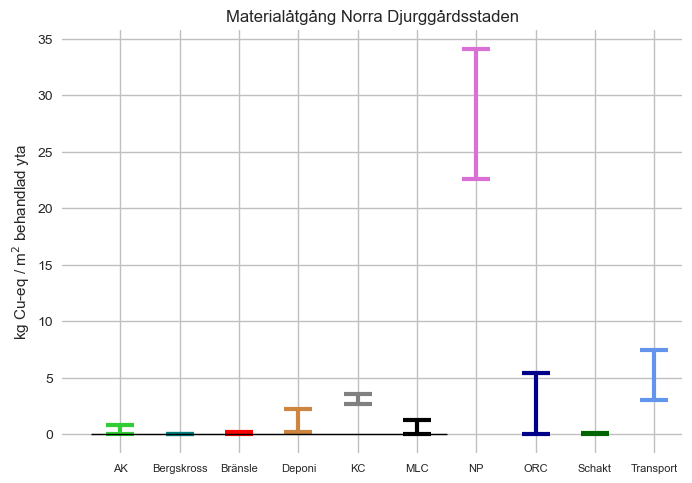

In [39]:
# color: https://matplotlib.org/stable/gallery/color/named_colors.html 
xlabels = ('AK', 'Bergskross', 'Bränsle', 'Deponi', 'KC', 'MLC', 'NP', 'ORC', 'Schakt', 'Transport')

fig, ax = plt.subplots()

ax.errorbar(y=Alla2_M_MLC_med, x=6, yerr = Alla2_M_MLC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='black')
ax.errorbar(y=Alla2_M_Transport_med, x=10, yerr = Alla2_M_Transport_e, capsize=10, elinewidth=3, markeredgewidth=3, color='cornflowerblue')
ax.errorbar(y=Alla2_M_Schakt_med, x=9, yerr = Alla2_M_Schakt_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkgreen')
ax.errorbar(y=Alla2_M_Deponi_med, x=4, yerr = Alla2_M_Deponi_e, capsize=10, elinewidth=3, markeredgewidth=3, color='peru')
ax.errorbar(y=Alla2_M_Bergskross_med, x=2, yerr = Alla2_M_Bergskross_e, capsize=10, elinewidth=3, markeredgewidth=3, color='teal')
ax.errorbar(y=Alla2_M_KC_med, x=5, yerr = Alla2_M_KC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='gray')
ax.errorbar(y=Alla2_M_SP_med, x=7, yerr = Alla2_M_SP_e, capsize=10, elinewidth=3, markeredgewidth=3, color='orchid')
ax.errorbar(y=Alla2_M_AK_med, x=1, yerr = Alla2_M_AK_e, capsize=10, elinewidth=3, markeredgewidth=3, color='limegreen')
ax.errorbar(y=Alla2_M_ORC_med, x=8, yerr = Alla2_M_ORC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkblue')
ax.errorbar(y=Alla2_M_Bränsle_med, x=3, yerr = Alla2_M_Bränsle_e, capsize=10, elinewidth=3, markeredgewidth=3, color='red')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=1, color='black')

ax.set_title('Materialåtgång Norra Djurggårdsstaden')
ax.set_xticks((1,2,3,4,5,6,7,8,9,10))
ax.set_xticklabels(xlabels, fontsize=8)
ax.set_ylabel(m_label)

In [40]:
fig.savefig('Material-May', dpi=600, bbox_inches='tight')

In [41]:
Alla2_W_MLC_min, Alla2_W_MLC_max, Alla2_W_MLC_med, Alla2_W_MLC_e = calcMinMaxMedianError(Alla2_W_MLC_Y, w_string)
Alla2_W_Transport_min, Alla2_W_Transport_max, Alla2_W_Transport_med, Alla2_W_Transport_e = calcMinMaxMedianError(Alla2_W_Transport_Y, w_string)
Alla2_W_Schakt_min, Alla2_W_Schakt_max, Alla2_W_Schakt_med, Alla2_W_Schakt_e = calcMinMaxMedianError(Alla2_W_Schakt_Y, w_string)
Alla2_W_Deponi_min, Alla2_W_Deponi_max, Alla2_W_Deponi_med, Alla2_W_Deponi_e = calcMinMaxMedianError(Alla2_W_Deponi_Y, w_string)
Alla2_W_Bergskross_min, Alla2_W_Bergskross_max, Alla2_W_Bergskross_med, Alla2_W_Bergskross_e = calcMinMaxMedianError(Alla2_W_Bergskross_Y, w_string)
Alla2_W_KC_min, Alla2_W_KC_max, Alla2_W_KC_med, Alla2_W_KC_e = calcMinMaxMedianError(Alla2_W_KC_Y, w_string)
Alla2_W_SP_min, Alla2_W_SP_max, Alla2_W_SP_med, Alla2_W_SP_e = calcMinMaxMedianError(Alla2_W_SP_Y, w_string)
Alla2_W_AK_min, Alla2_W_AK_max, Alla2_W_AK_med, Alla2_W_AK_e = calcMinMaxMedianError(Alla2_W_AK_Y, w_string)
Alla2_W_ORC_min, Alla2_W_ORC_max, Alla2_W_ORC_med, Alla2_W_ORC_e = calcMinMaxMedianError(Alla2_W_ORC_Y, w_string)
Alla2_W_Bränsle_min, Alla2_W_Bränsle_max, Alla2_W_Bränsle_med, Alla2_W_Bränsle_e = calcMinMaxMedianError(Alla2_W_Bränsle_Y, w_string)


Text(0, 0.5, 'm$^{3}$ / m$^{2}$ behandlad yta')

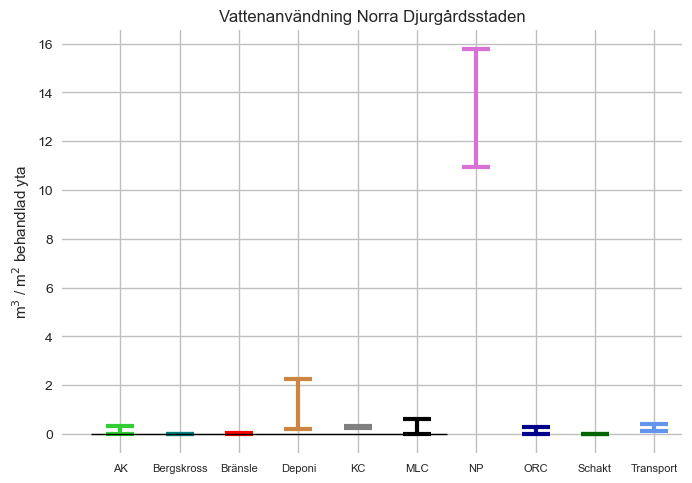

In [42]:
# color: https://matplotlib.org/stable/gallery/color/named_colors.html 
xlabels = ('AK', 'Bergskross', 'Bränsle', 'Deponi', 'KC', 'MLC', 'NP', 'ORC', 'Schakt', 'Transport')

fig, ax = plt.subplots()

ax.errorbar(y=Alla2_W_MLC_med, x=6, yerr = Alla2_W_MLC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='black')
ax.errorbar(y=Alla2_W_Transport_med, x=10, yerr = Alla2_W_Transport_e, capsize=10, elinewidth=3, markeredgewidth=3, color='cornflowerblue')
ax.errorbar(y=Alla2_W_Schakt_med, x=9, yerr = Alla2_W_Schakt_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkgreen')
ax.errorbar(y=Alla2_W_Deponi_med, x=4, yerr = Alla2_W_Deponi_e, capsize=10, elinewidth=3, markeredgewidth=3, color='peru')
ax.errorbar(y=Alla2_W_Bergskross_med, x=2, yerr = Alla2_W_Bergskross_e, capsize=10, elinewidth=3, markeredgewidth=3, color='teal')
ax.errorbar(y=Alla2_W_KC_med, x=5, yerr = Alla2_W_KC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='gray')
ax.errorbar(y=Alla2_W_SP_med, x=7, yerr = Alla2_W_SP_e, capsize=10, elinewidth=3, markeredgewidth=3, color='orchid')
ax.errorbar(y=Alla2_W_AK_med, x=1, yerr = Alla2_W_AK_e, capsize=10, elinewidth=3, markeredgewidth=3, color='limegreen')
ax.errorbar(y=Alla2_W_ORC_med, x=8, yerr = Alla2_W_ORC_e, capsize=10, elinewidth=3, markeredgewidth=3, color='darkblue')
ax.errorbar(y=Alla2_W_Bränsle_med, x=3, yerr = Alla2_W_Bränsle_e, capsize=10, elinewidth=3, markeredgewidth=3, color='red')

ax.set_facecolor('white')
ax.grid(color='silver')

ax.hlines(y=0, xmin=0.5, xmax=6.5, linewidth=1, color='black')

ax.set_title('Vattenanvändning Norra Djurgårdsstaden')
ax.set_xticks((1,2,3,4,5,6,7,8,9,10))
ax.set_xticklabels(xlabels, fontsize=8)
ax.set_ylabel(w_label)

In [43]:
fig.savefig('Wateruse-May', dpi=600, bbox_inches='tight')

## Sobol

In [103]:
# Sobol
from lca_algebraic.stats import incer_stochastic_matrix_return

In [104]:
Ei_akt = findActivity("ALLA", db_name=USER_DB)

In [105]:
sob1, problem1 = incer_stochastic_matrix_return(Ei_akt, all_methods, n=5000)

Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' 

Generating samples ...


C:\Users\liza-\anaconda3\envs\brightway\Lib\site-packages\SALib\sample\saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (5000) is equal to `2^n`.
        
  warnings.warn(msg)


Transforming samples ...
Processing Sobol indices ...
Processing sobol for ('IPCC 2021', 'climate change: total (excl. biogenic CO2)', 'global warming potential (GWP100)')


C:\Users\liza-\anaconda3\envs\brightway\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Processing sobol for ('ReCiPe 2016 v1.03, midpoint (H) no LT', 'acidification: terrestrial no LT', 'terrestrial acidification potential (TAP) no LT')
Processing sobol for ('ReCiPe 2016 v1.03, midpoint (H) no LT', 'eutrophication: freshwater no LT', 'freshwater eutrophication potential (FEP) no LT')
Processing sobol for ('ReCiPe 2016 v1.03, midpoint (H) no LT', 'eutrophication: marine no LT', 'marine eutrophication potential (MEP) no LT')
Processing sobol for ('ReCiPe 2016 v1.03, midpoint (H) no LT', 'material resources: metals/minerals no LT', 'surplus ore potential (SOP) no LT')
Processing sobol for ('ReCiPe 2016 v1.03, midpoint (H) no LT', 'water use no LT', 'water consumption potential (WCP) no LT')


In [106]:
sob_df1 = pd.DataFrame()
sob_df1_round = pd.DataFrame()

In [107]:
for s, name in zip(sob1.s1, problem1['names']): # and every sobol & name
    sob_df1[name] = s

In [108]:
sob_df1

,AmountAC,AmountH2O,AmountKC,AmountNaOH,AmountORC,AmountOxidering,AmountStone,Biodiesel_CH4,Biodiesel_CO,Biodiesel_N2O,...,TrDisTAM,Tr_Copper_WS,Tr_Rubber_WS,Tr_Steel_WS,Tr_VS_CA,WS_machine_weight,WeightOfLoader,WorkingDay,oxid_switch_param,sikt_switch_param
0,0.001175,3.802398e-11,0.011541,0.000766,0.000124,0.043038,0.000014,2.707167e-08,0.0,-0.000003,...,3.287976e-07,-1.099485e-07,-1.221889e-07,-2.566850e-06,0.000022,0.000137,-3.364846e-07,0.000013,0.699177,0.065865
1,0.000431,-3.328602e-10,0.000580,0.000205,0.000273,0.057682,0.000015,0.000000e+00,0.0,0.000000,...,1.114380e-07,5.791216e-09,-1.227133e-08,-4.201543e-07,0.000002,0.000052,1.631067e-08,0.000007,0.327149,0.022777
2,0.001415,2.481431e-10,0.000471,0.001318,-0.000053,0.011598,0.000052,0.000000e+00,0.0,0.000000,...,8.484010e-08,-2.569827e-08,-2.080250e-08,-8.302335e-07,-0.000017,0.000417,-3.092337e-07,0.000012,0.960099,-0.000465
3,0.000162,-4.603524e-11,0.000154,0.020108,0.003835,0.164711,0.000038,0.000000e+00,0.0,0.000000,...,2.827029e-07,2.694198e-07,6.281435e-08,4.128555e-06,0.000247,0.000150,7.526238e-07,0.000090,0.390021,0.100847
4,0.000058,-1.797213e-09,0.003411,0.029307,0.013421,0.117441,-0.000004,0.000000e+00,0.0,0.000000,...,7.172774e-07,1.717610e-07,1.099427e-07,6.438643e-06,0.000457,-0.000043,3.011715e-06,0.000307,0.375635,0.274435
5,0.000014,9.708834e-10,0.000168,0.000367,0.000379,0.078989,0.000022,0.000000e+00,0.0,0.000000,...,8.828339e-08,3.007243e-08,5.395559e-09,8.933032e-07,0.000005,0.000022,2.472719e-07,0.000006,0.303683,0.441972


In [109]:
with pd.ExcelWriter('Sobol.xlsx') as writer:  
    sob_df1.to_excel(writer, sheet_name='Alla')

In [157]:
problem1, params, Y2 = _stochastics(Ei_akt, all_methods, n=5000) #optimalt antal iterationer

Generating samples ...


C:\Users\liza-\anaconda3\envs\brightway\Lib\site-packages\SALib\sample\saltelli.py:110: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (5000) is equal to `2^n`.
        
  warnings.warn(msg)


Transforming samples ...


Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' : backing to amount
Error while parsing formula '' 

(       climate change: total (excl. biogenic CO2) - global warming potential (GWP100) [kg CO2-Eq / kWh]  \
 median                                         885.369763                                                 
 std                                             79.319198                                                 
 p                 [764.9211114477547, 1023.6593317638457]                                                 
 mean                                           888.979879                                                 
 var                                              0.089225                                                 
 
        acidification: terrestrial no LT - terrestrial acidification potential (TAP) no LT [kg SO2-Eq / kWh]  \
 median                                           7.411896                                                     
 std                                              0.664408                                                     
 p            

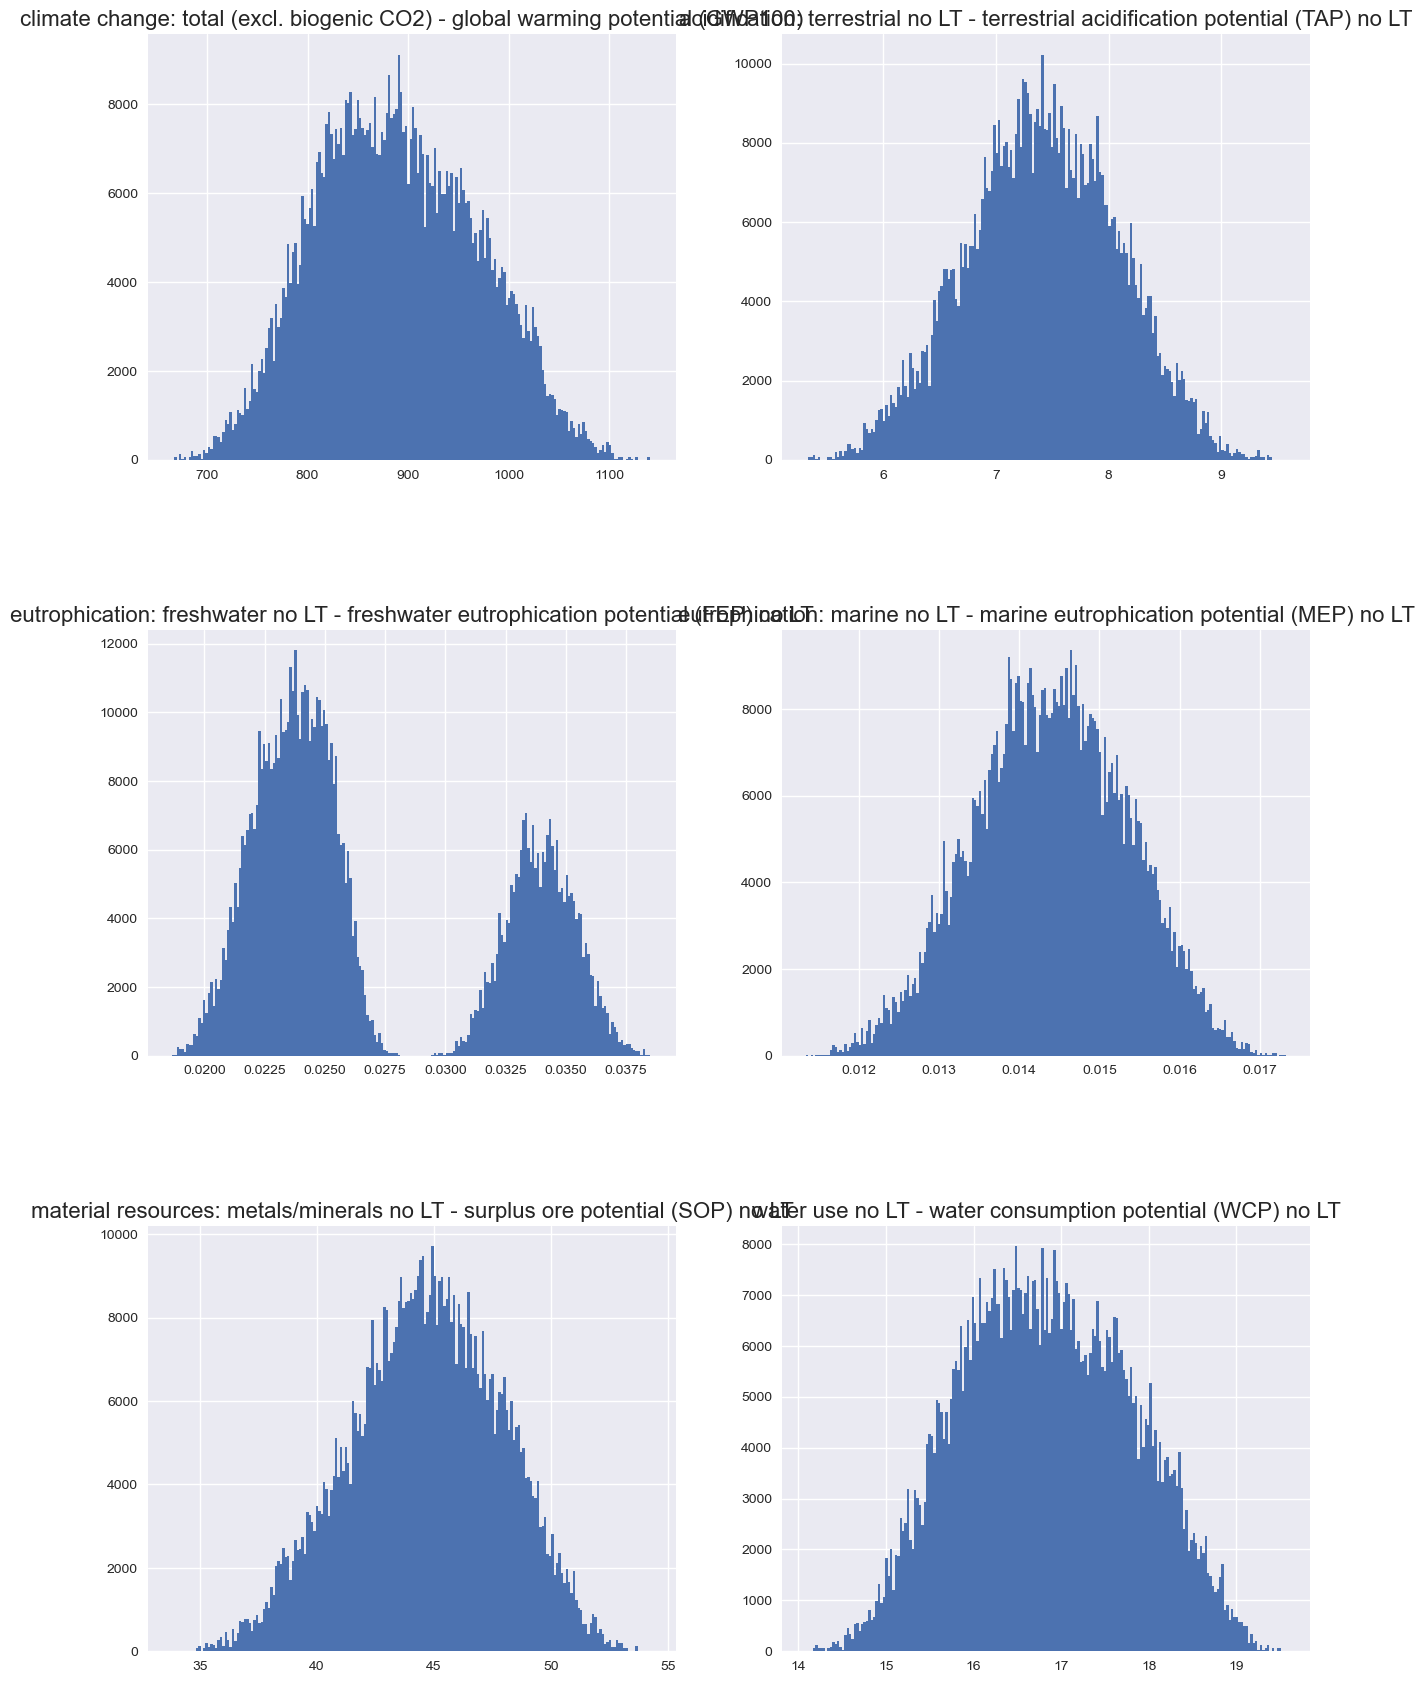

In [158]:
distrib(
    Ei_akt, all_methods, Y=Y2,
    
    # Optionnal layout parameters
    height=7, width=15,
    nb_cols=2)

## define switches

In [ ]:
#DO NOT TOUCH

In [ ]:
# just a random ei act for now, to be replaced later
ei_act = getActByCode('ecoinvent-3.11-cutoff', '28c0797a4fe97dc50747cd39ad8508e5')

In [27]:
na=ag.new_activity("Siktning") #Rör inte

AttributeError: 'str' object has no attribute 'new_activity'

In [19]:
na['name'] = 'Siktning'
na['unit'] = 'unit'
na['reference product'] = "Siktning"
na.save()

In [ ]:
ne3 = na.new_exchange(input=na, amount=1, type='production')
ne3.save()

In [24]:
na2=fg.new_activity("Deponi")
na2['name'] = 'Deponi'
na2['unit'] = 'unit'
na2['reference product'] = "Deponi"
na2.save()

In [47]:
ne2=na2.new_exchange(input=na2, amount=1, type='production')
ne2.save()

In [25]:
ne4 = na2.new_exchange(input=ei_act, amount=1, type='technosphere')
ne4.save()

In [29]:
sikt_switch_param = newEnumParam(

    'sikt_switch_param',

    values=["siktning", "deponi"], # If provided as list, all possibilities have te same probability

    default="deponi",

    description="Switch on sikt")

In [57]:
sikt_act = getActByCode('Schakt Deponi', 'Siktning')
deponi_act = getActByCode('Schakt Deponi', 'Deponi')

In [60]:
siktSwitch = newSwitchAct('Schakt Deponi',

    "siktSwitch", # Name

    sikt_switch_param, # Switch parameter

    {

        "siktning" : sikt_act,

        "deponi": deponi_act

    })

siktSwitch.addExchanges({siktSwitch:1})

In [61]:
oxid_switch_param = newEnumParam(

    'oxid_switch_param',

    values=["Oxidering", "OxideringKol", "OxideringORC"], # If provided as list, all possibilities have te same probability

    default="Oxidering",

    description="Switch on oxidering")

In [62]:
oxidering_act = getActByCode('Schakt Deponi', '04365d8fc109487186b0e047653bcd05')
oxideringKol_act = getActByCode('Schakt Deponi', 'ce54fac45bf24dc78d661c14456a3b64')
oxideringORC_act = getActByCode('Schakt Deponi', '63fc21c25251460fb848340429c21aec')


In [63]:
oxideringSwitch = newSwitchAct('Schakt Deponi',

    "oxideringSwitch", #oxidering_act = getActByCode('Schakt Deponi', '04365d8fc109487186b0e047653bcd05')
oxideringKol_act = getActByCode('Schakt Deponi', 'ce54fac45bf24dc78d661c14456a3b64')
oxideringORC_act = getActByCode('Schakt Deponi', '63fc21c25251460fb848340429c21aec')
 Name

    oxid_switch_param, # Switch parameter

    {

        "Oxidering" : oxidering_act,

        "OxideringKol": oxideringKol_act,
        
        "OxideringORC": oxideringORC_act

    })

oxideringSwitch.addExchanges({oxideringSwitch:1})

In [35]:
activityDiesel=la.newActivity(USER_DB,
    "diesel",
    "unit",
    )

In [36]:
activityBiodiesel=la.newActivity(USER_DB,
    "biodiesel",
    "unit",
    )

In [37]:
diesel_switch_param = newEnumParam(

    'diesel_switch_param',

    values=["diesel", "biodiesel"], # If provided as list, all possibilities have te same probability

    default="diesel",

    description="Switch on diesel")

In [38]:
diesel_act = getActByCode('Schakt Deponi', 'diesel')
biodiesel_act = getActByCode('Schakt Deponi', 'biodiesel')

In [39]:
dieselSwitch = newSwitchAct('Schakt Deponi',

    "dieselSwitch", 

    diesel_switch_param, # Switch parameter

    {

        "diesel" : diesel_act,

        "biodiesel": biodiesel_act,

    })
dieselSwitch.addExchanges({dieselSwitch:1})

Utgångskod 

In [ ]:
# steg 1: definiera diskret parameter

sikt_switch_param = newEnumParam(

    'sikt_switch_param',

    values=["siktning", "deponi"], # If provided as list, all possibilities have te same probability

    default="deponi",

    description="Switch on sikt")

--

# (steg 1.5: definiera aktiviteter vi vill ”switcha” mellan i ab om inte har gjort det)

--

# steg 2: hitta aktiviteterna i databasen så vi kan stoppa in dem i switch-aktiviteten, i exemplet aktiviteter i ecoinvent

elecWindpower = getActByCode('cutoff391', '1d9be64d54b61ac64ba8a6f7ca220371')

elecCoal = getActByCode('cutoff391', '7bea67942b5e008ee3dc5bafec8e1614')

--

# steg 3: definiera aktiviteten som kommer konsumera den diskreta parametern

elecSwitch = newSwitchAct('wwt_db',

    "elecSwitch", # Name

    elec_switch_param, # Switch parameter

    {

        "elecWindpower" : elecWindpower,

        "elecCoal": elecCoal

    })

elecSwitch.addExchanges({elecSwitch:1})